# Exploration of factors influencing students’ PISA scores in Singapore with Machine Learning approaches: Regression Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score


import xgboost as xgb
from xgboost.sklearn import XGBRegressor

import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
# Feature Importance 
import shap
from sklearn.inspection import PartialDependenceDisplay

In [2]:
#Import main data file
pisa2018_japan = pd.read_csv('datasets/pisa2018_japan.csv')

In [3]:
pisa2018_japan.head()

CNTRYID    CNTSCHID    CNTSTUID                              STRATUM  \
0   Japan  39200001.0  39200462.0  JPN - stratum 01: Public & Academic   
1   Japan  39200001.0  39200850.0  JPN - stratum 01: Public & Academic   
2   Japan  39200001.0  39200893.0  JPN - stratum 01: Public & Academic   
3   Japan  39200001.0  39201063.0  JPN - stratum 01: Public & Academic   
4   Japan  39200001.0  39201234.0  JPN - stratum 01: Public & Academic   

   EFFORT1  EFFORT2                         OCOD1  \
0      9.0     10.0  Secondary education teachers   
1      6.0      8.0         General office clerks   
2      8.0      8.0                       Missing   
3      8.0     10.0            Office supervisors   
4      6.0      6.0         Shop sales assistants   

                                               OCOD2                   OCOD3  \
0            Managing directors and chief executives  Teaching professionals   
1  Vague(a good job, a quiet job, a well paid job...      Office supervisors   
2                                              Cooks                 Missing   
3  Vague(a good job, a quiet job, a well paid job...             Pharmacists   
4  Vague(a good job, a quiet job, a well paid job...     Building architects   

   GRADE  ...                   UNIT WVARSTRR    SENWT             VER_DAT  \
0    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
1    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
2    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
3    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
4    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   

  test GENDER      MATH   SCIENCE      READ  TOTALSCORE  
0  NaN      0  670.5027  698.8997  665.6133  678.338567  
1  NaN      0  634.4499  643.3303  588.5543  622.111500  
2  NaN      1  650.2053  633.4754  620.5581  634.746267  
3  NaN      1  627.7649  653.6993  682.7571  654.740433  
4  NaN      1  688.1381  678.1488  677.4935  681.260133  

[5 rows x 129 columns]

In [4]:
#Check simple statistics
pisa2018_japan.describe().round(2).T

count         mean      std          min          25%  \
CNTSCHID    6109.0  39200092.77    53.63  39200001.00  39200046.00   
CNTSTUID    6109.0  39203215.85  1855.82  39200001.00  39201611.00   
EFFORT1     5680.0         7.14     2.17         1.00         6.00   
EFFORT2     5664.0         8.42     1.85         1.00         8.00   
GRADE       6109.0         0.00     0.00         0.00         0.00   
...            ...          ...      ...          ...          ...   
GENDER      6109.0         0.51     0.50         0.00         0.00   
MATH        6109.0       526.59    80.43       248.82       470.63   
SCIENCE     6109.0       529.01    87.51       235.78       467.75   
READ        6109.0       503.48    93.98       136.54       440.43   
TOTALSCORE  6109.0       519.69    84.55       224.87       461.15   

                    50%          75%          max  
CNTSCHID    39200093.00  39200139.00  39200185.00  
CNTSTUID    39203219.00  39204825.00  39206423.00  
EFFORT1            7.00         9.00        10.00  
EFFORT2            9.00        10.00        10.00  
GRADE              0.00         0.00         0.00  
...                 ...          ...          ...  
GENDER             1.00         1.00         1.00  
MATH             530.47       585.30       768.02  
SCIENCE          534.47       593.86       759.72  
READ             508.07       571.01       750.15  
TOTALSCORE       524.52       582.19       737.42  

[107 rows x 8 columns]

In [5]:
pisa2018_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Columns: 129 entries, CNTRYID to TOTALSCORE
dtypes: float64(106), int64(1), object(22)
memory usage: 6.0+ MB


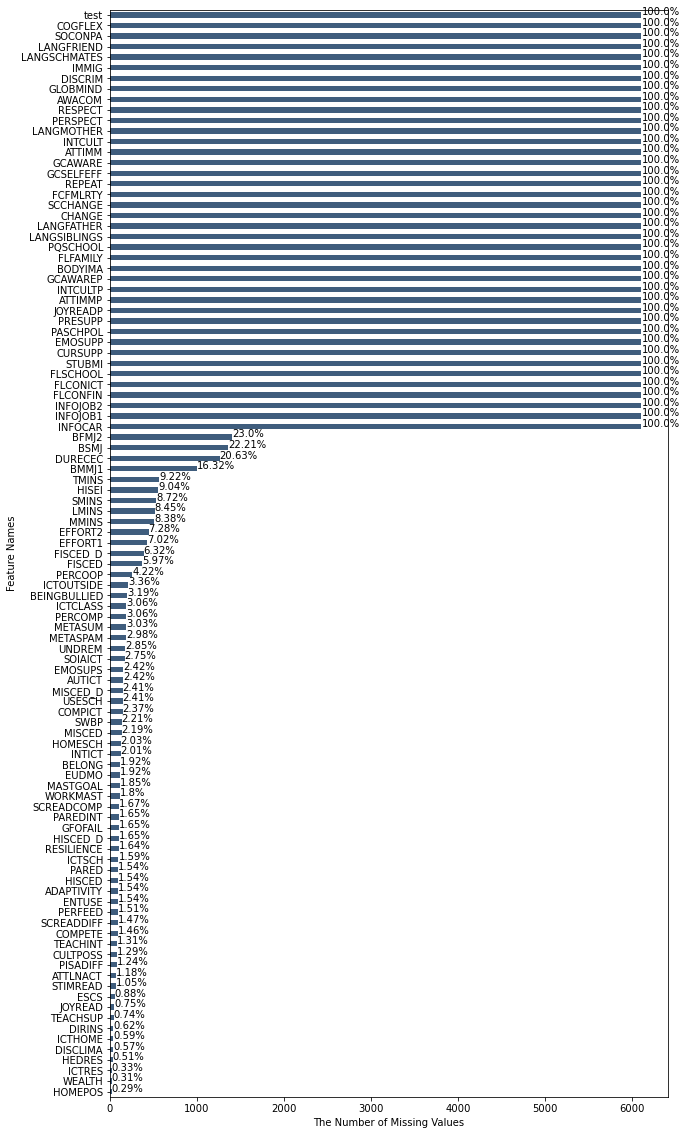

In [6]:
#Checking percentage of null values

Nan = pisa2018_japan.isnull().sum()[pisa2018_japan.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/pisa2018_japan.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [7]:
#Drop column with NAN more than 10%
NanPer = len(pisa2018_japan) *.90
pisa2018_japan = pisa2018_japan.dropna(thresh=NanPer, axis=1)

In [8]:
#Split data into train and test
train_japan , test_japan  = train_test_split(pisa2018_japan, test_size=0.2, random_state=42)

print(f"No. of training examples: {train_japan.shape[0]}")
print(f"No. of testing examples: {test_japan.shape[0]}")

No. of training examples: 4887
No. of testing examples: 1222


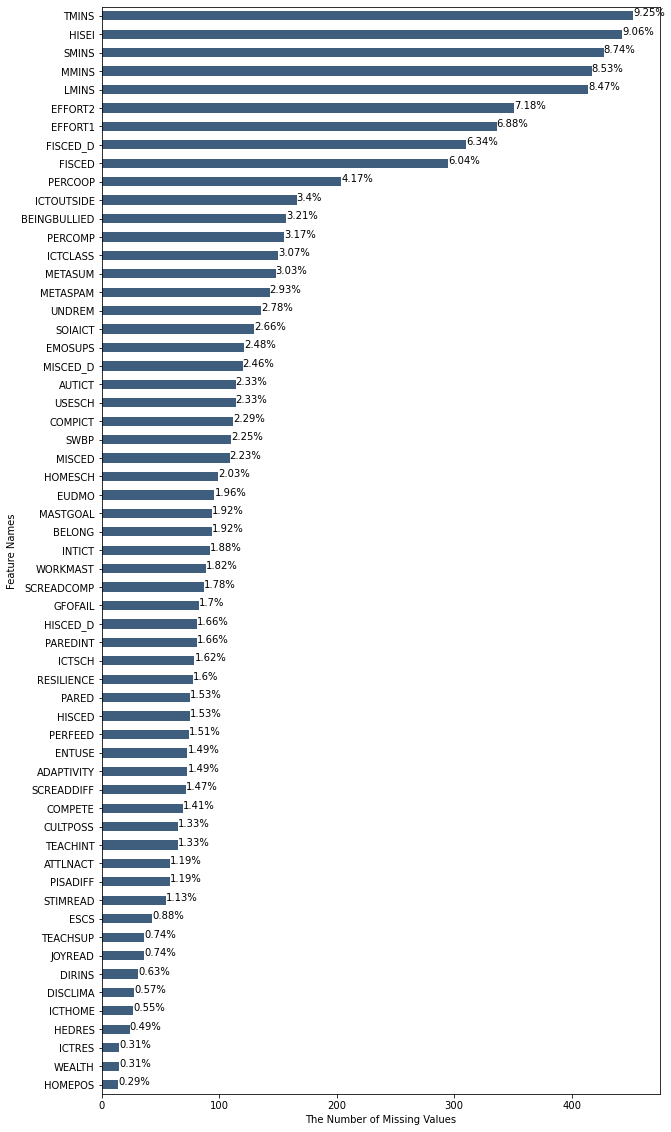

In [9]:
#Checking percentage of null values

Nan = train_japan.isnull().sum()[train_japan.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/train_japan.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [10]:
#change data type
train_japan['GENDER'] = train_japan['GENDER'].astype('object')
test_japan['GENDER'] = test_japan['GENDER'].astype('object')

In [11]:
#Fill NAN values with train columns' median
numvar = train_japan.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    train_japan[col].fillna(train_japan[col].median(), inplace=True)
    test_japan[col].fillna(train_japan[col].median(), inplace=True)

In [12]:
#Fill NAN values with train columns' mode
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index)
for col in categorical_features:
    train_japan[col].fillna(train_japan[col].mode()[0], inplace=True)
    test_japan[col].fillna(train_japan[col].mode()[0], inplace=True)

In [13]:
train_japan.isnull().sum().sum(),test_japan.isnull().sum().sum()

(0, 0)

In [14]:
list(train_japan.columns)

['CNTRYID',
 'CNTSCHID',
 'CNTSTUID',
 'STRATUM',
 'EFFORT1',
 'EFFORT2',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'GRADE',
 'AGE',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'PARED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'PAREDINT',
 'HISEI',
 'MMINS',
 'LMINS',
 'SMINS',
 'TMINS',
 'ESCS',
 'UNDREM',
 'METASUM',
 'METASPAM',
 'ICTHOME',
 'ICTSCH',
 'HOMEPOS',
 'CULTPOSS',
 'HEDRES',
 'WEALTH',
 'ICTRES',
 'DISCLIMA',
 'TEACHSUP',
 'DIRINS',
 'PERFEED',
 'EMOSUPS',
 'STIMREAD',
 'ADAPTIVITY',
 'TEACHINT',
 'JOYREAD',
 'SCREADCOMP',
 'SCREADDIFF',
 'PISADIFF',
 'PERCOMP',
 'PERCOOP',
 'ATTLNACT',
 'COMPETE',
 'WORKMAST',
 'GFOFAIL',
 'EUDMO',
 'SWBP',
 'RESILIENCE',
 'MASTGOAL',
 'BELONG',
 'BEINGBULLIED',
 'ENTUSE',
 'HOMESCH',
 'USESCH',
 'INTICT',
 'COMPICT',
 'AUTICT',
 'SOIAICT',
 'ICTCLASS',
 'ICTOUTSIDE',
 'UNIT',
 'WVARSTRR',
 'SENWT',
 'VER_DAT',
 'GENDER',
 'MATH',
 'SCIENCE',
 'READ',
 'TOTALSCORE']

In [15]:
#Set CNTSTUID as index
train_japan.set_index('CNTSTUID', inplace=True)
test_japan.set_index('CNTSTUID', inplace=True)

In [16]:
train_japan.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)
test_japan.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)

In [17]:
train_japan.shape, test_japan.shape

((4887, 70), (1222, 70))

## Exploring numerical variables

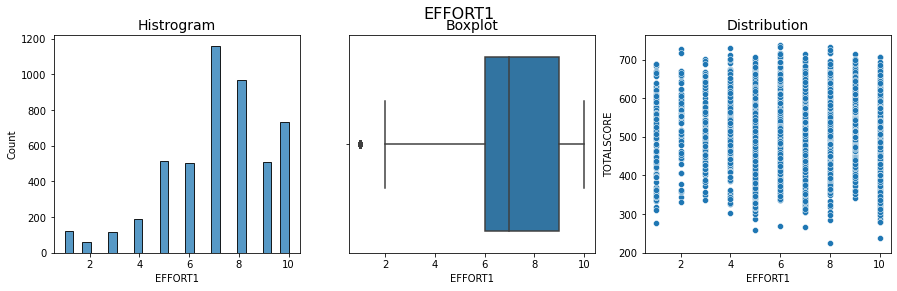

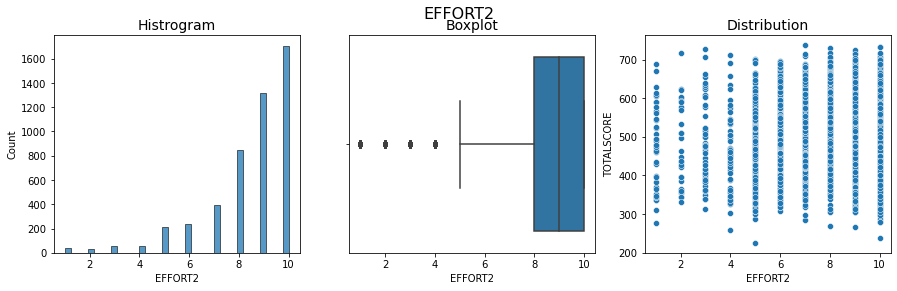

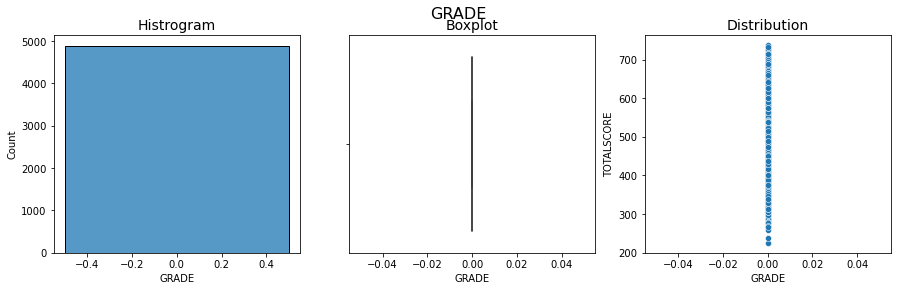

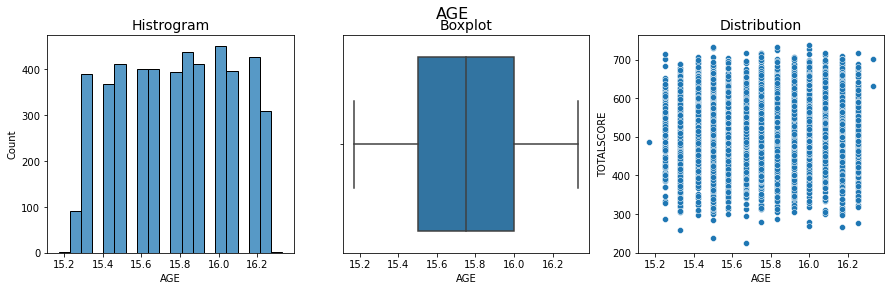

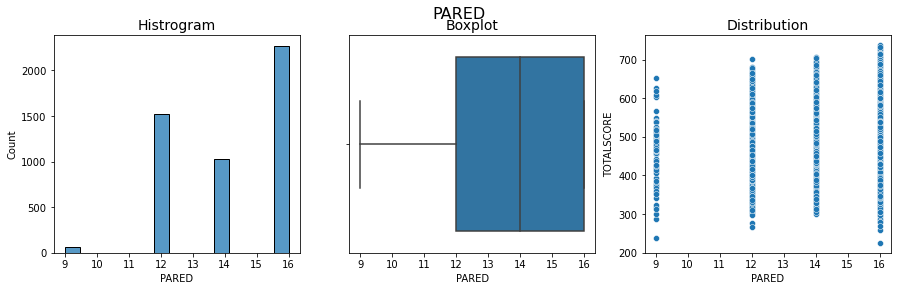

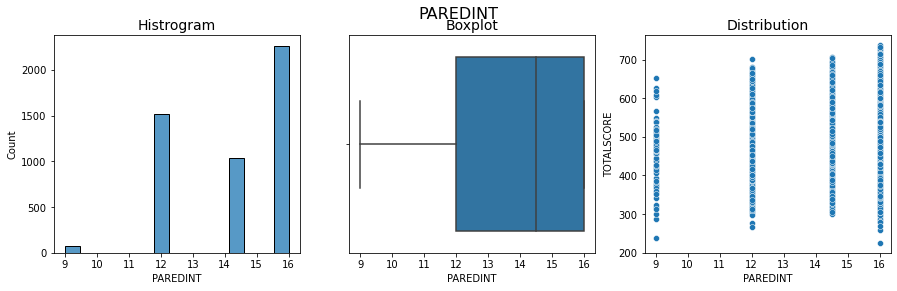

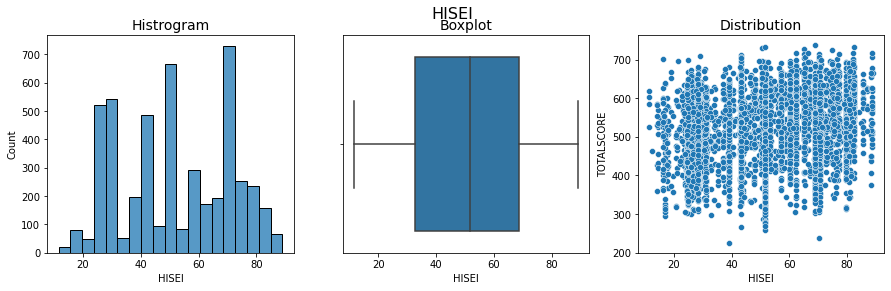

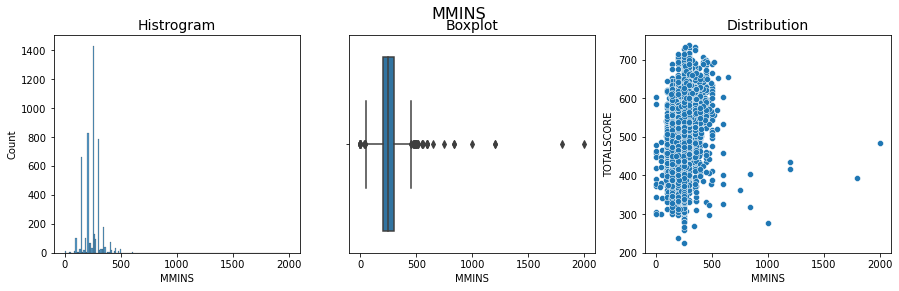

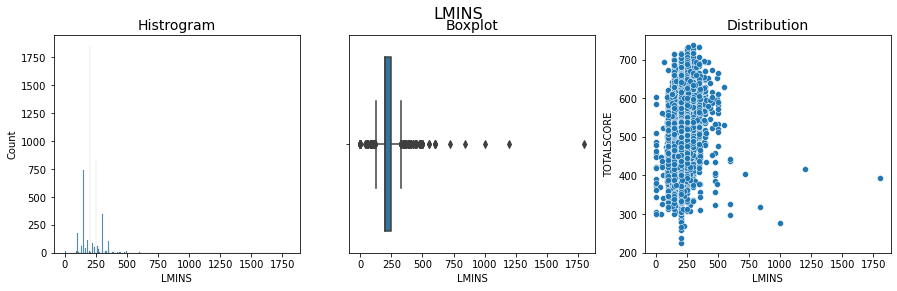

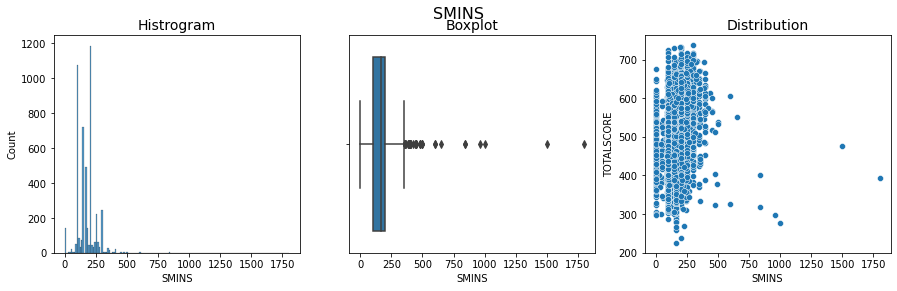

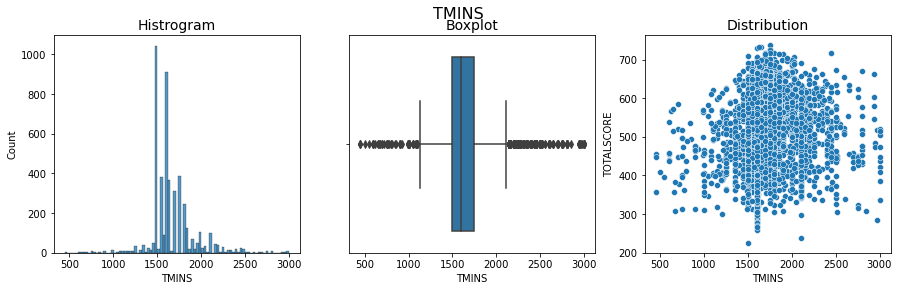

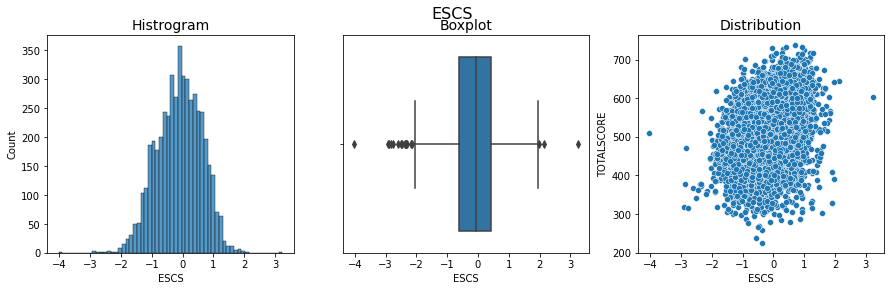

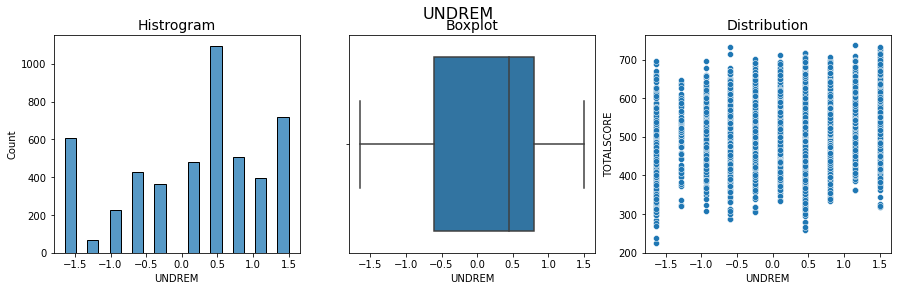

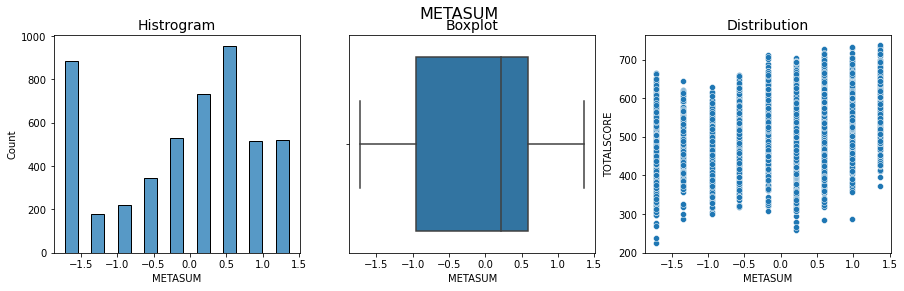

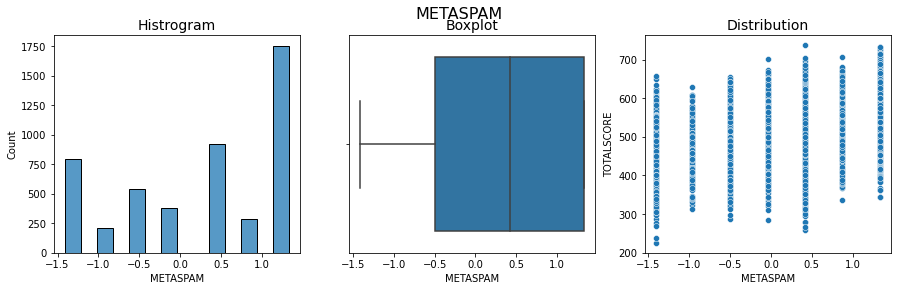

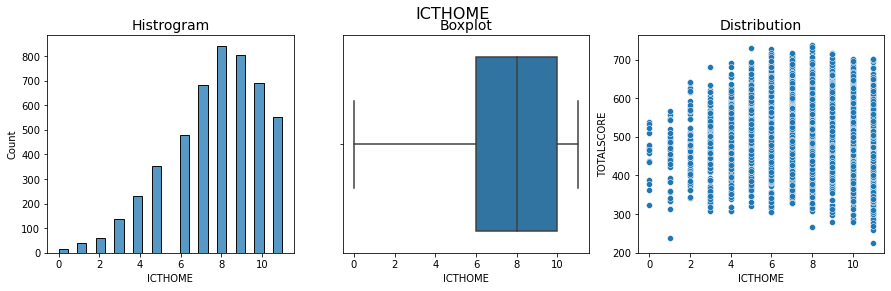

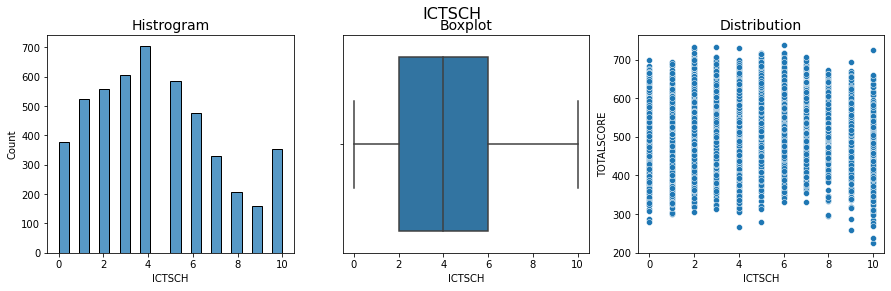

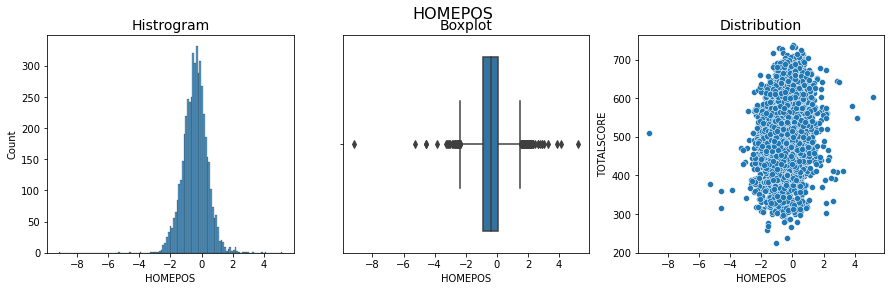

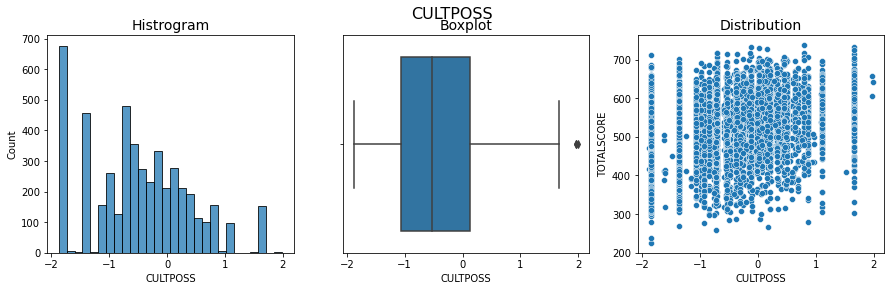

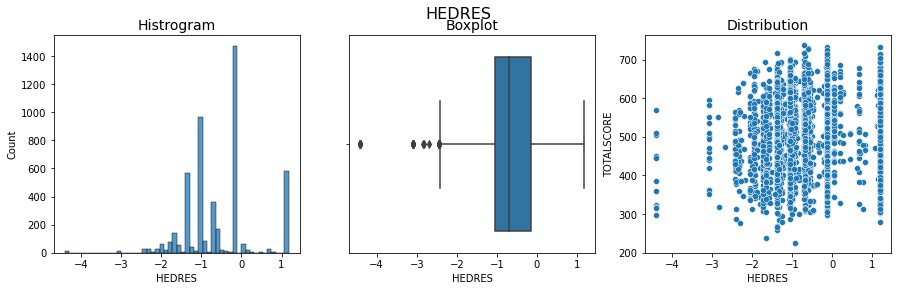

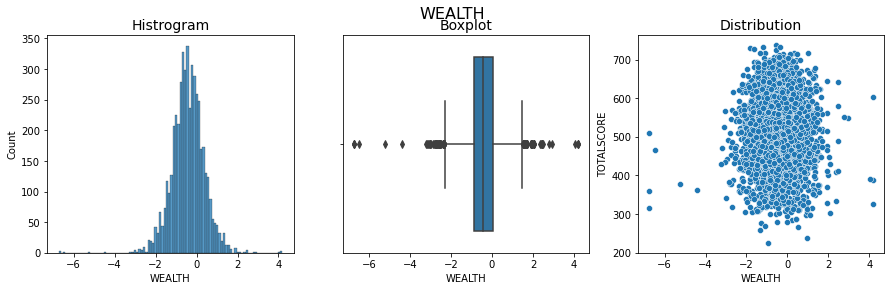

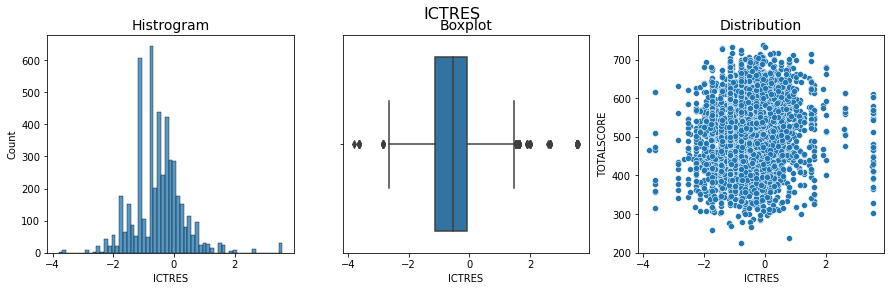

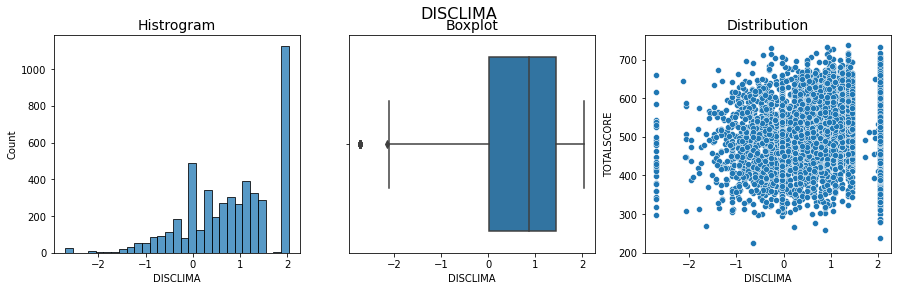

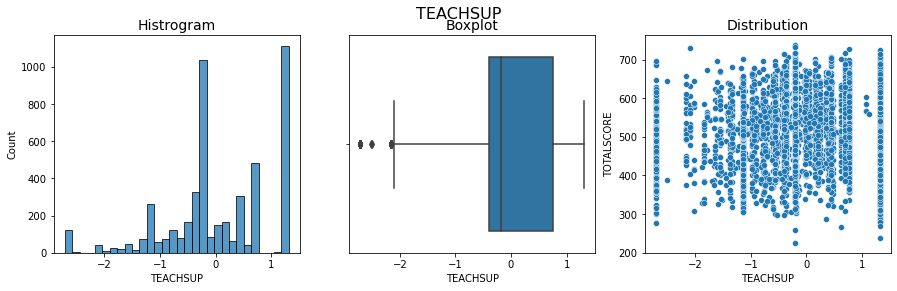

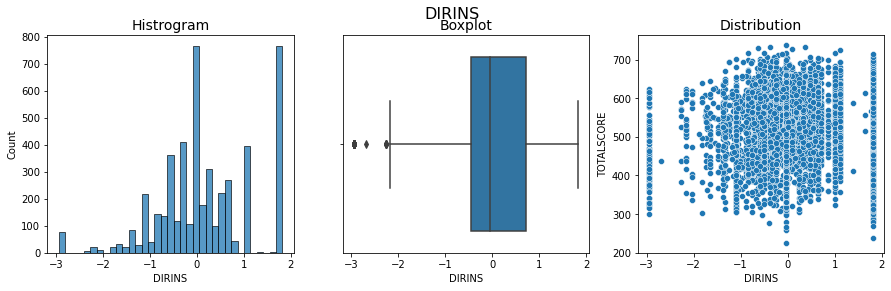

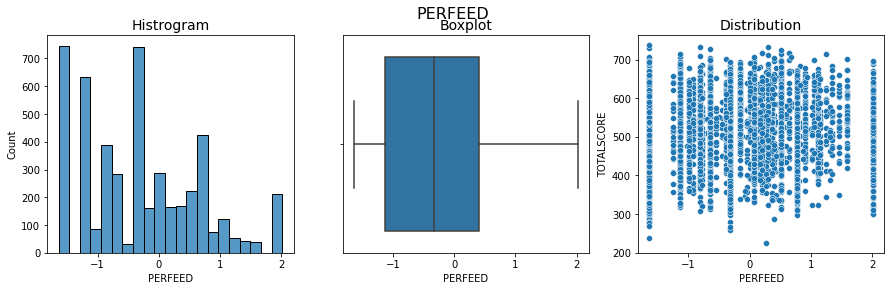

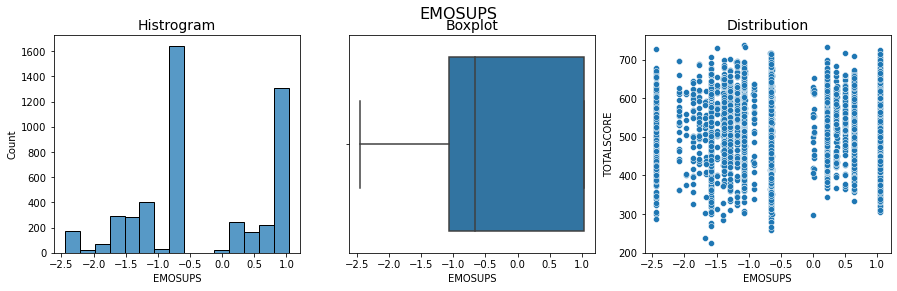

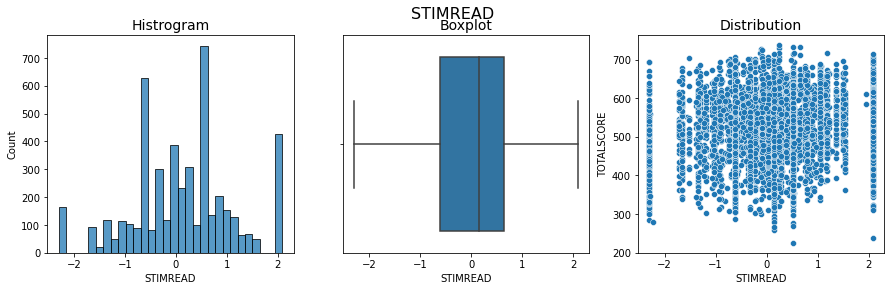

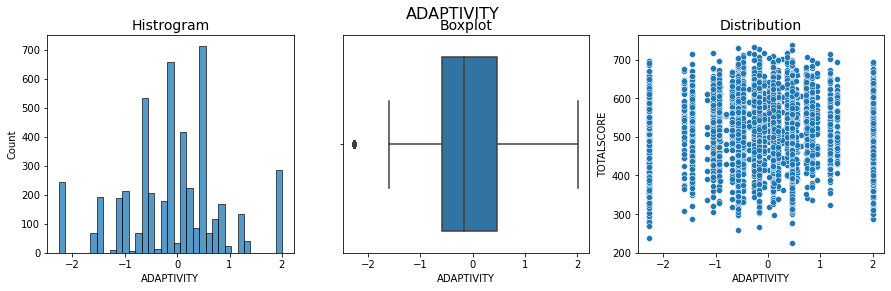

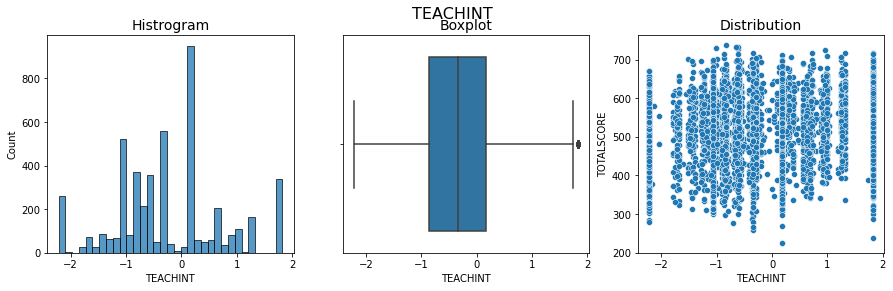

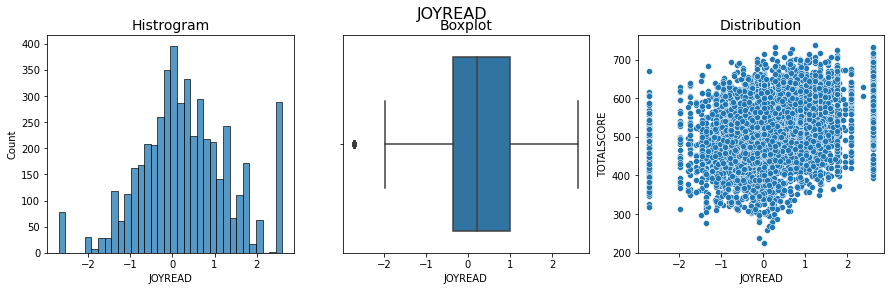

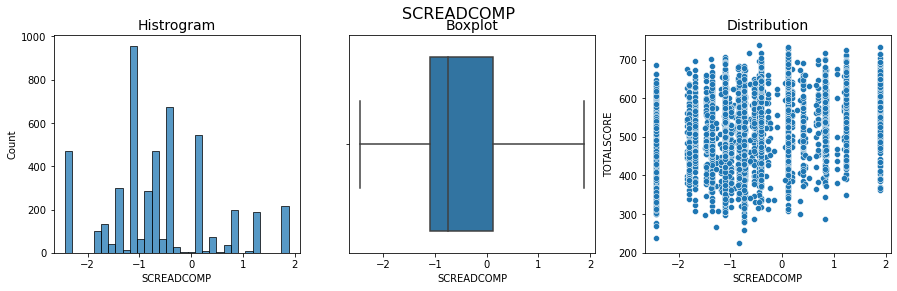

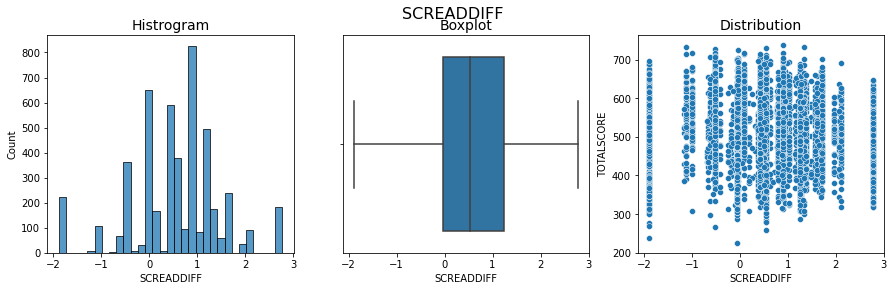

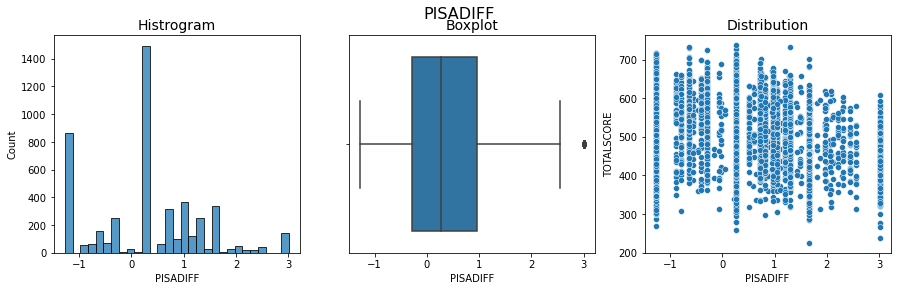

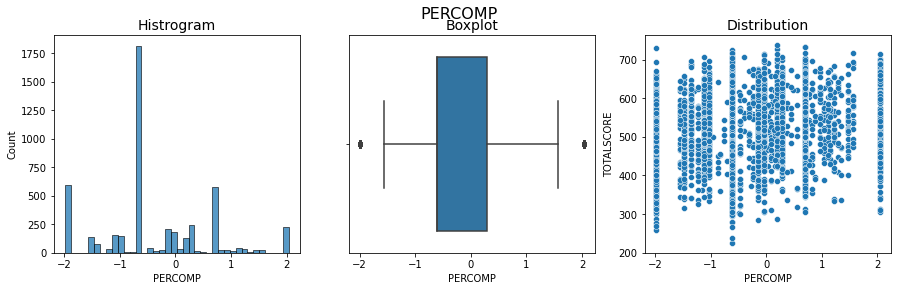

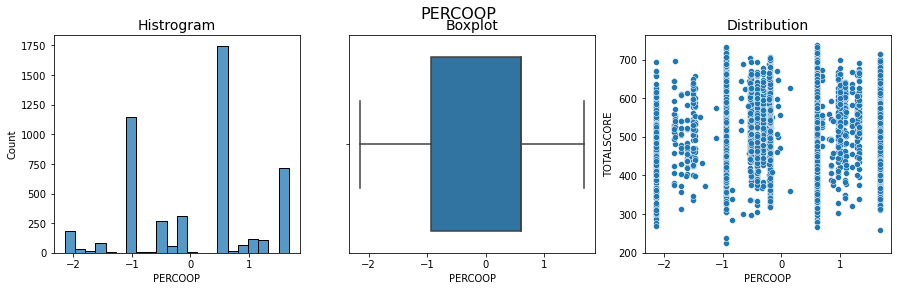

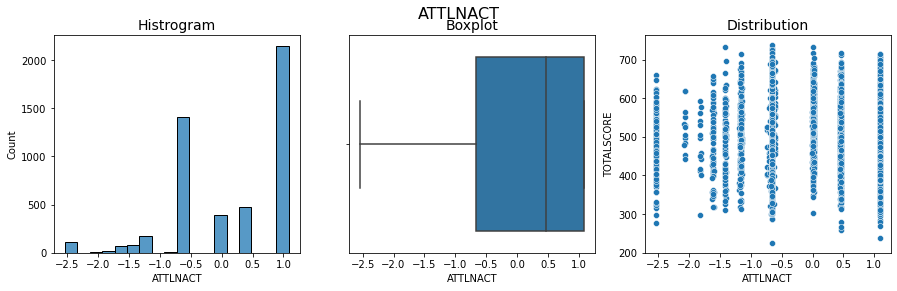

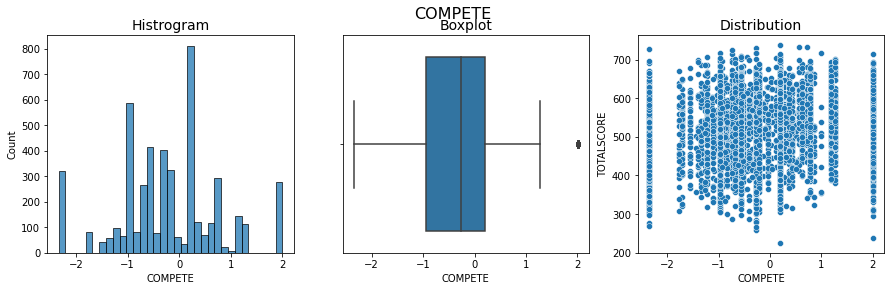

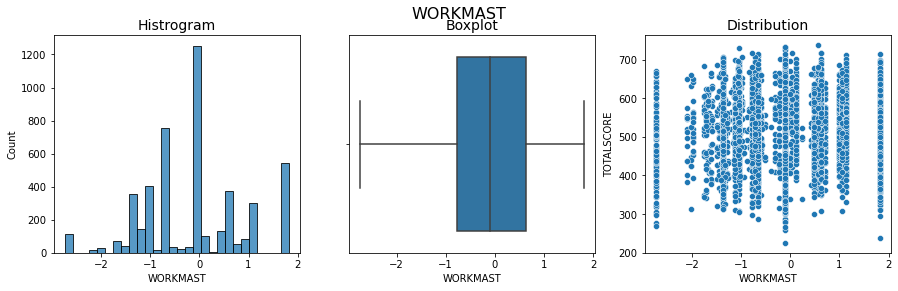

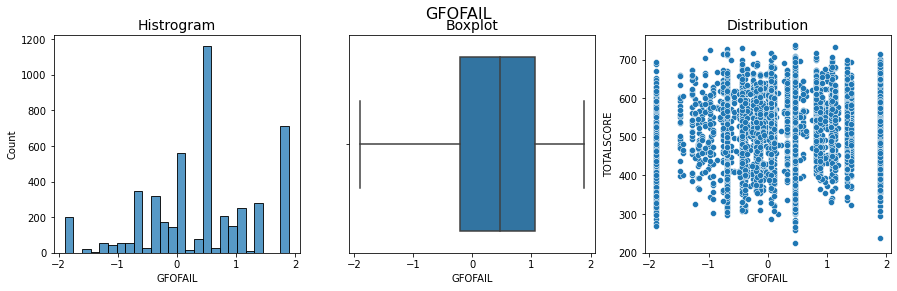

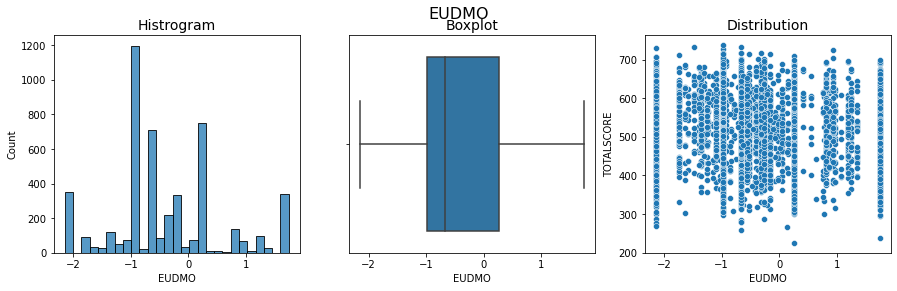

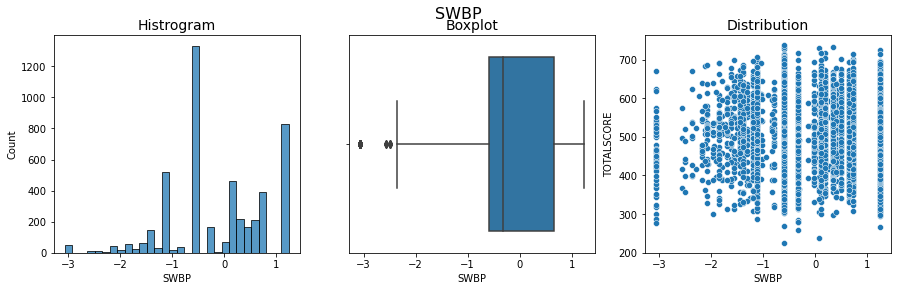

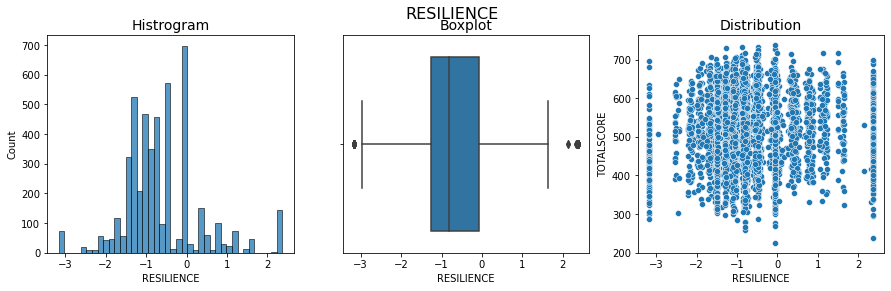

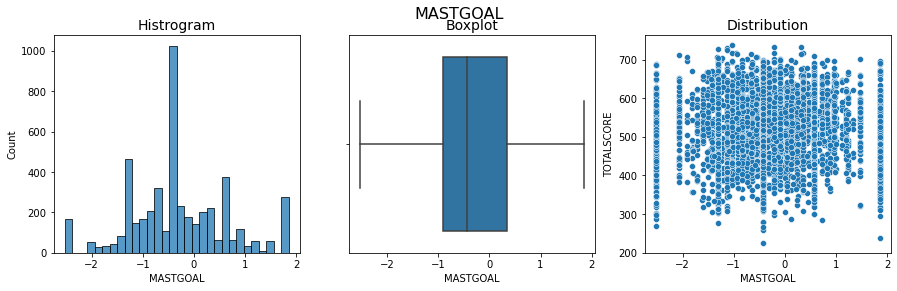

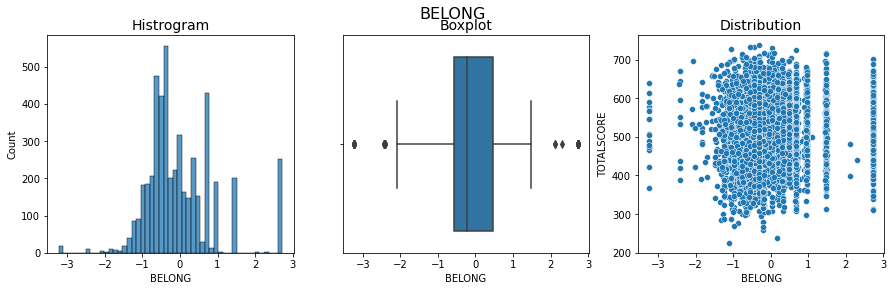

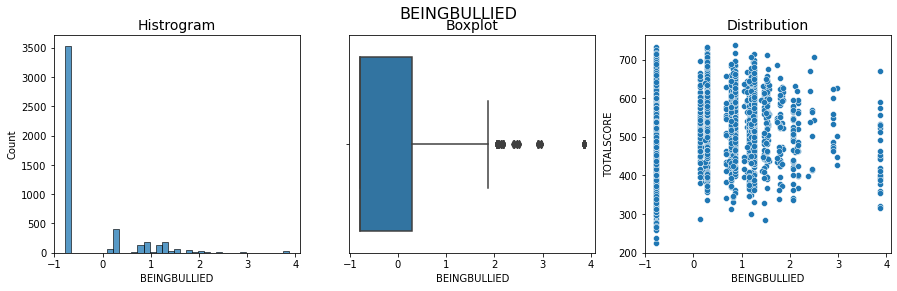

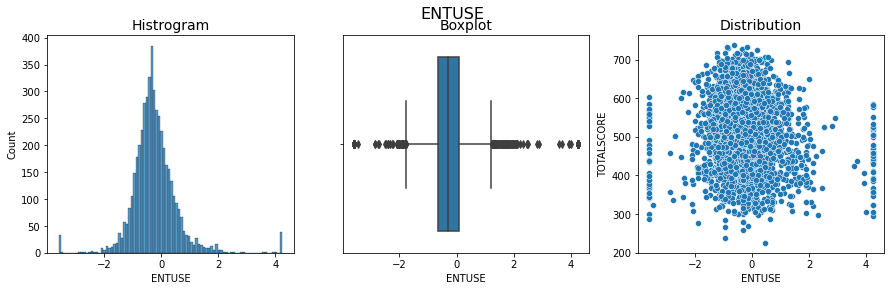

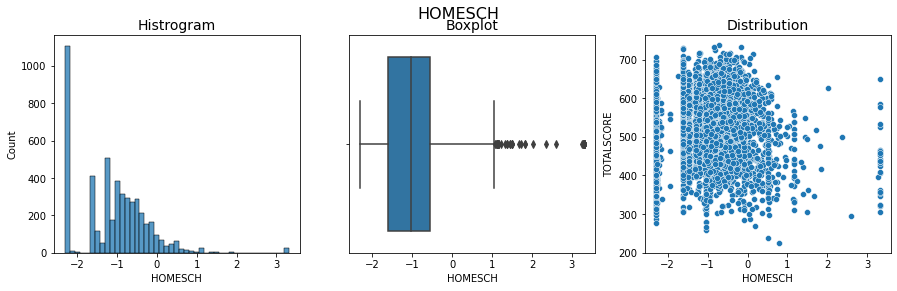

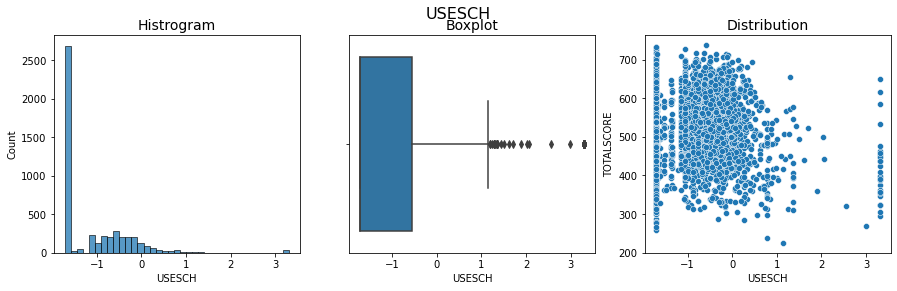

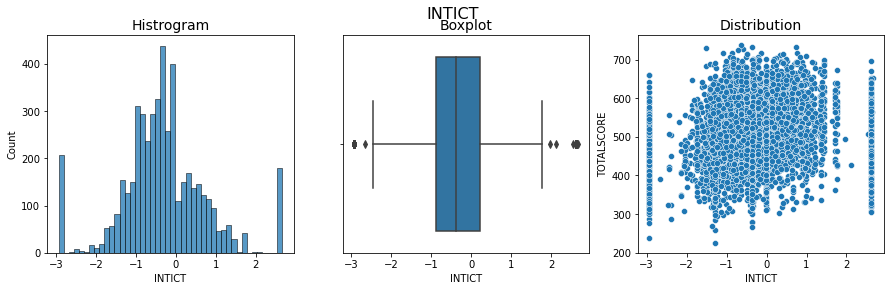

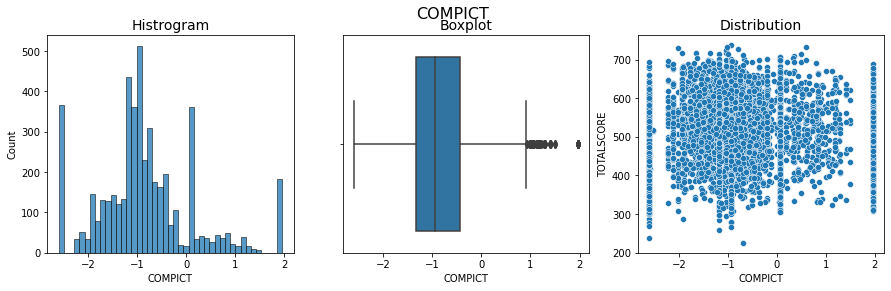

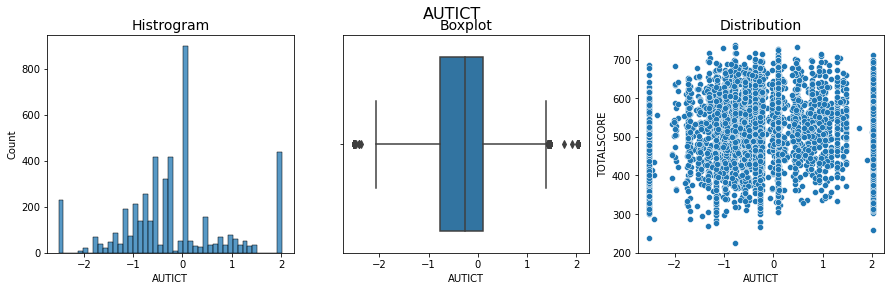

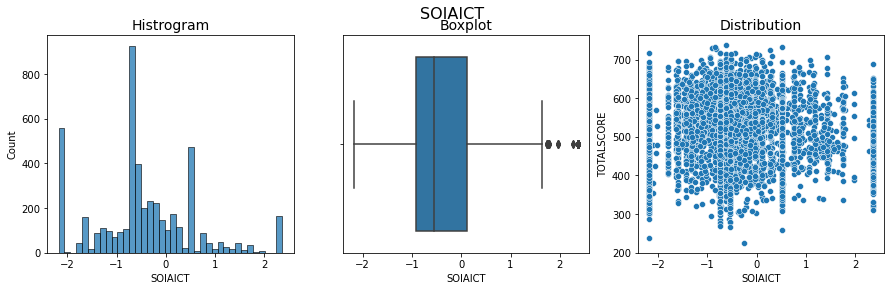

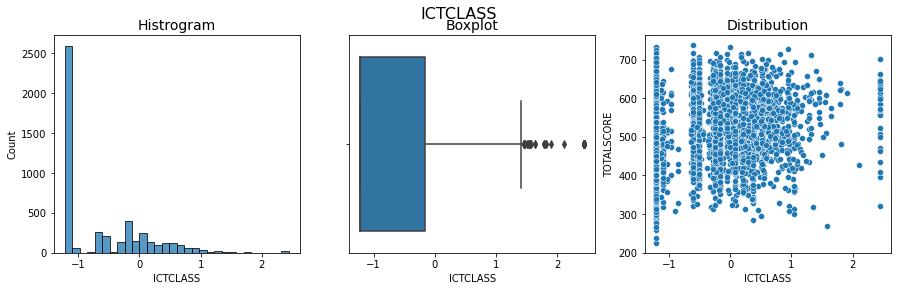

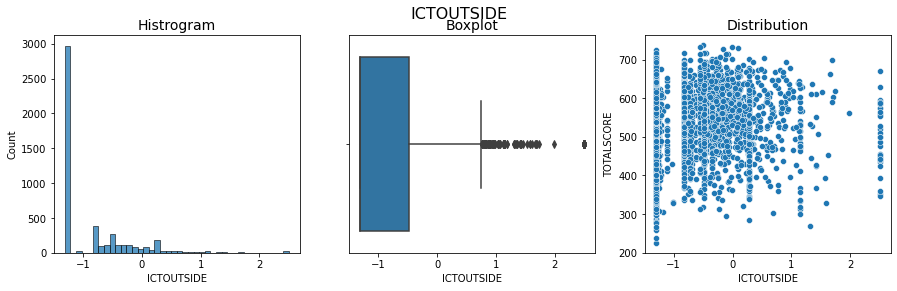

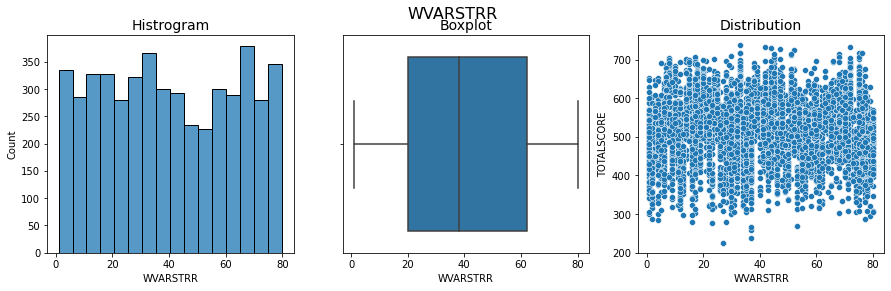

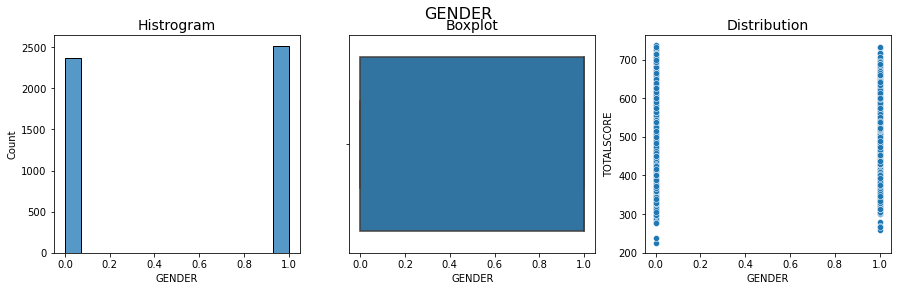

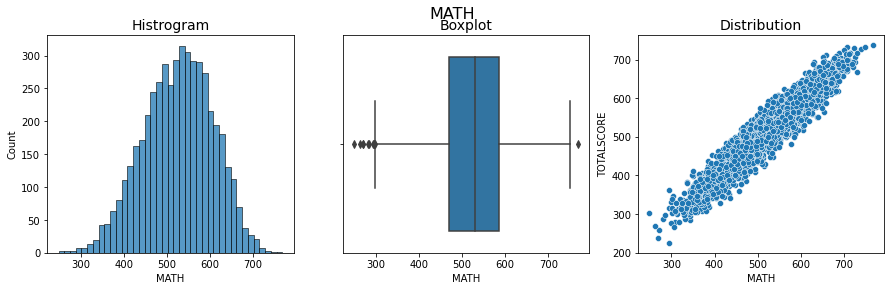

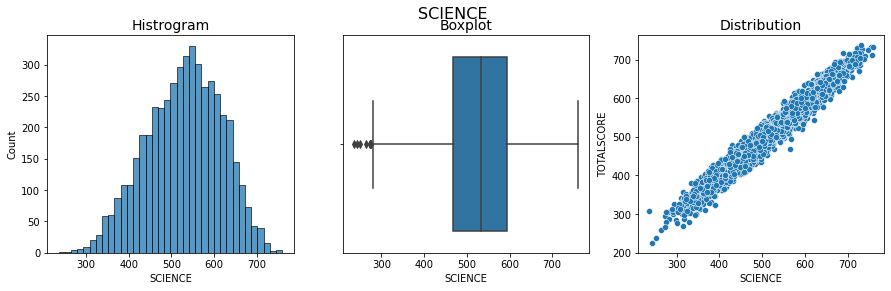

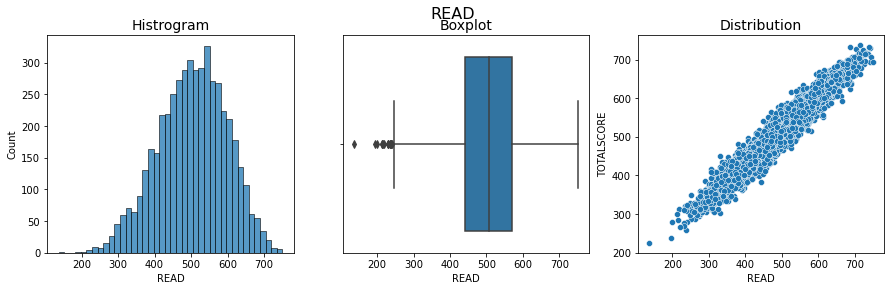

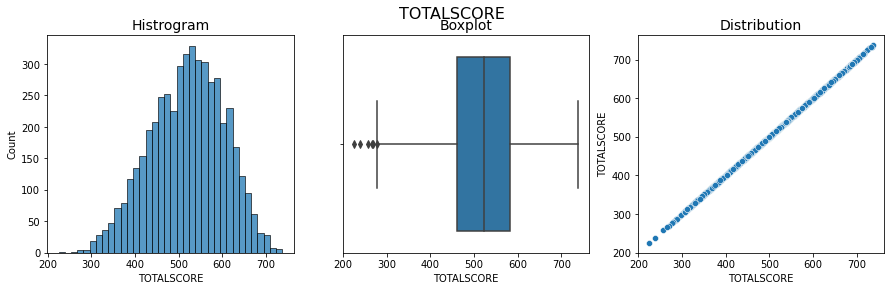

In [18]:
#Create Histrogram plot, Boxplot and Distribution plot of numerical features
numvar = train_japan.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(train_japan[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=train_japan[col], ax=ax[1])
    ax[2].set_title(f'Distribution', fontsize =14)
    sns.scatterplot(x = train_japan[col], y= train_japan['TOTALSCORE'],ax=ax[2])
    plt.show()

In [19]:
#remove extreme outliers
train_japan = train_japan[(train_japan['MMINS'] < 1500)]
train_japan = train_japan[(train_japan['LMINS'] < 1500)]
train_japan = train_japan[(train_japan['SMINS'] < 1500)]
train_japan = train_japan[(train_japan['ESCS'] > -4)]
train_japan = train_japan[(train_japan['HOMEPOS'] > -5)]
train_japan = train_japan[(train_japan['WEALTH'] > -4)]

In [20]:
train_japan.shape, test_japan.shape

((4878, 70), (1222, 70))

## Exploring categorical features

In [21]:
# Create a function to plot boxplot for categorical features

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train_japan.groupby(column).mean()['TOTALSCORE'].sort_values().index
        
        sns.boxplot(x = dataframe[column],y = dataframe['TOTALSCORE'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f'TOTALSCORE  vs {column}', fontsize =16)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

In [22]:
#Create boxplot
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index) 

In [35]:
categorical_features 

['ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D']

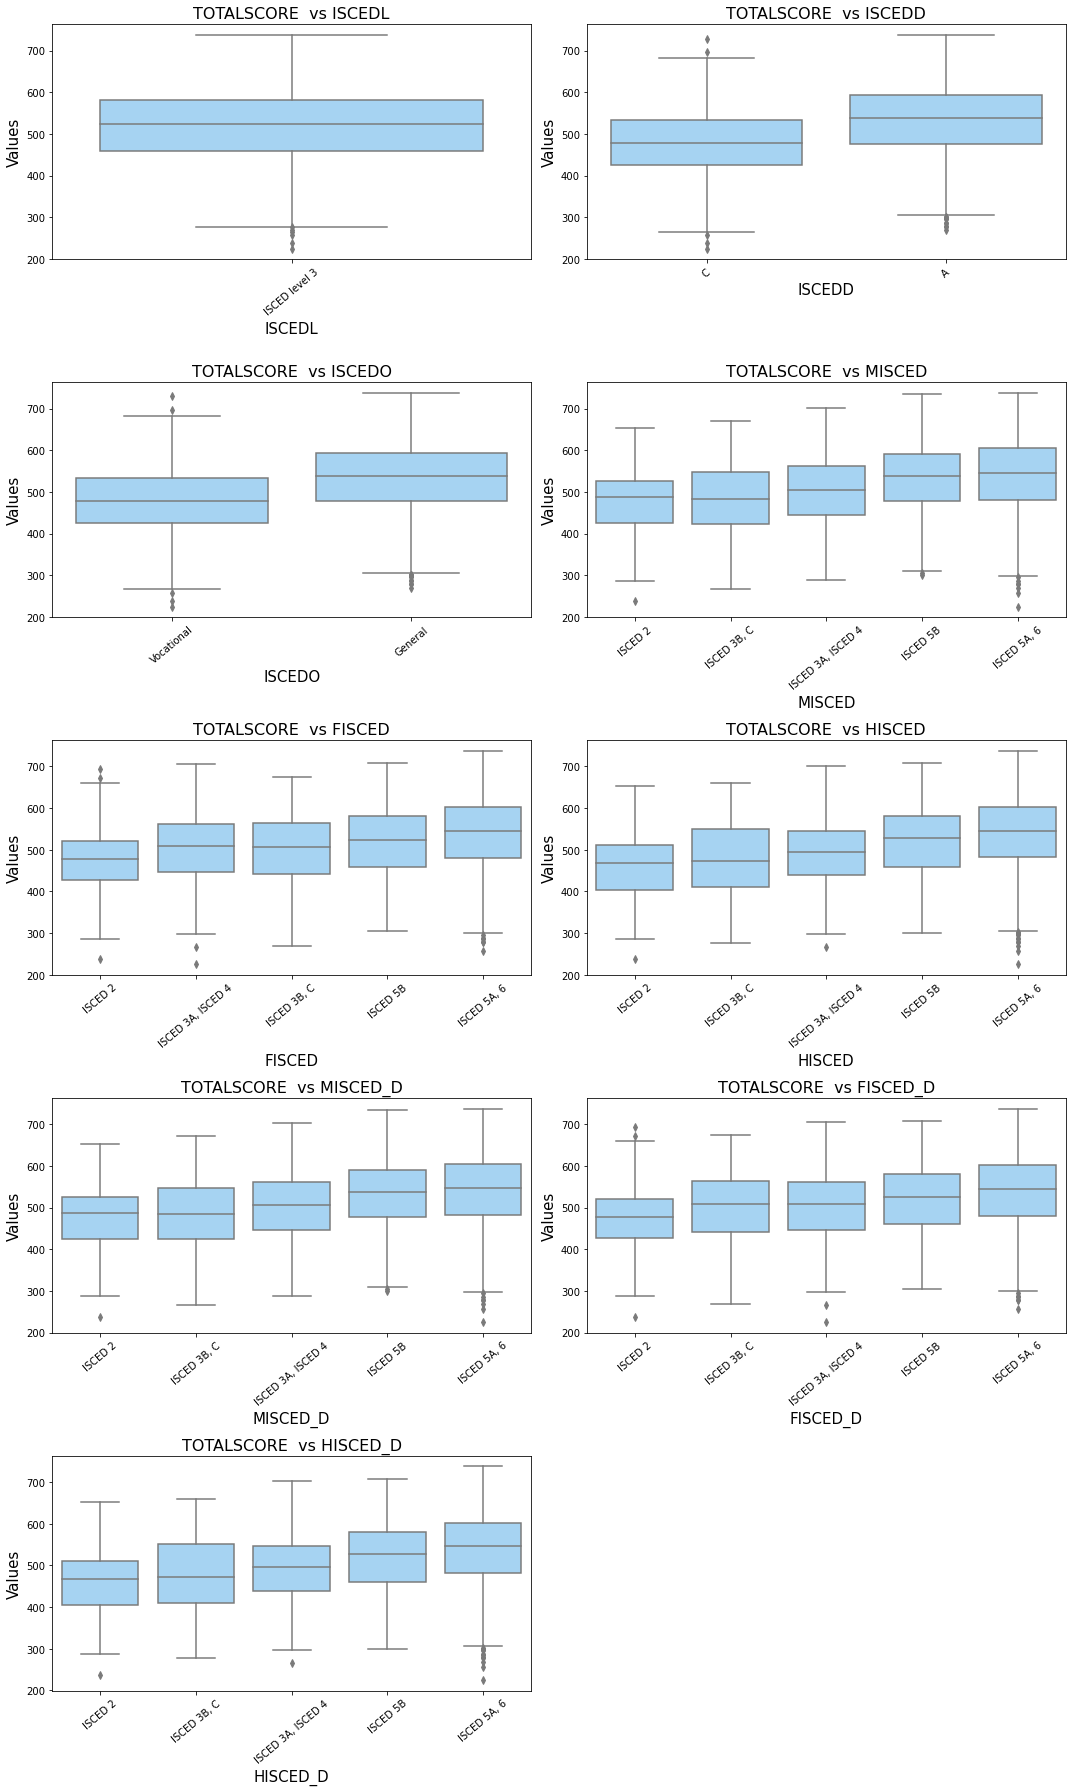

In [23]:
subplot_boxplot(train_japan, categorical_features)

According to the boxplots, some features has duplicated information. Moreover, the subgroup of 'MISCED', 'FISCED', 'HISCED' have similar means except 'ISCED 5A, 6', Thus, all subgroup will be combined into one group to reduce number of dummy codes. 

In [24]:
#Drop duplicated features 
train_japan.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD','ISCEDL'], axis =1, inplace = True)
test_japan.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD','ISCEDL'], axis =1, inplace = True)

In [25]:
#Grouping values of categorical columns to reduce number of categories. 
train_japan['Is_MISCED_5A,6'] = np.where(train_japan['MISCED'] == 'ISCED 5A, 6', 1, 0)
train_japan['Is_FISCED_5A,6'] = np.where(train_japan['FISCED'] == 'ISCED 5A, 6', 1, 0)
train_japan['Is_HISCED_5A,6'] = np.where(train_japan['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [26]:
#Grouping values of categorical columns to reduce number of categories. 
test_japan['Is_MISCED_5A,6'] = np.where(test_japan['MISCED'] == 'ISCED 5A, 6', 1, 0)
test_japan['Is_FISCED_5A,6'] = np.where(test_japan['FISCED'] == 'ISCED 5A, 6', 1, 0)
test_japan['Is_HISCED_5A,6'] = np.where(test_japan['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [27]:
#Drop original columns
train_japan.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)
test_japan.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)

## Explore relationship among features

<AxesSubplot:>

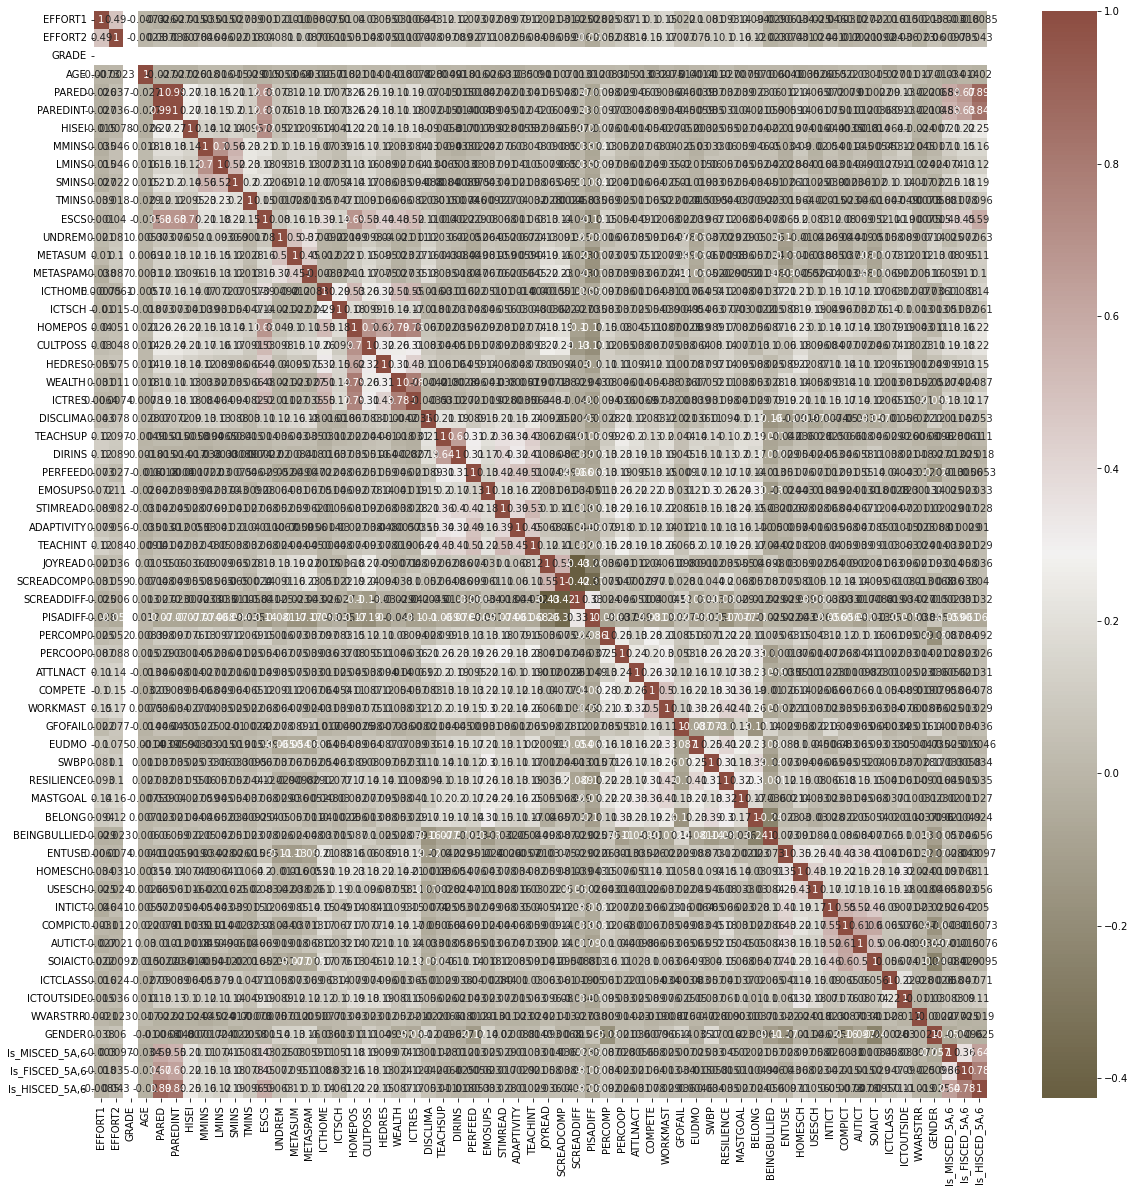

In [28]:
#Checking collinearity using correlation matrix
train_japan_cormatrix = train_japan.drop(columns= ['MATH','SCIENCE','READ','TOTALSCORE',], axis =1)
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train_japan_cormatrix.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [29]:
# Drop columns with high correlation 
#Create correlation matrix
corr_matrix = train_japan_cormatrix.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(f' Features to drop : {to_drop}')

 Features to drop : ['PAREDINT', 'Is_HISCED_5A,6']


In [30]:
# Drop features with high correlation among themselves
train_japan.drop(to_drop, axis=1, inplace=True)
test_japan.drop(to_drop, axis=1, inplace=True)
train_japan.shape, test_japan.shape

((4878, 63), (1222, 63))

## Exploring target variables

In [31]:
train_japan[['MATH','READ', 'SCIENCE','TOTALSCORE']].describe().round(2)

MATH     READ  SCIENCE  TOTALSCORE
count  4878.00  4878.00  4878.00     4878.00
mean    526.09   503.16   528.61      519.29
std      80.15    93.84    87.27       84.33
min     248.82   136.54   235.78      224.87
25%     470.41   439.99   466.86      459.96
50%     530.43   506.92   533.56      523.98
75%     584.61   571.09   593.55      581.34
max     768.02   750.15   759.72      737.42

<Figure size 432x432 with 0 Axes>

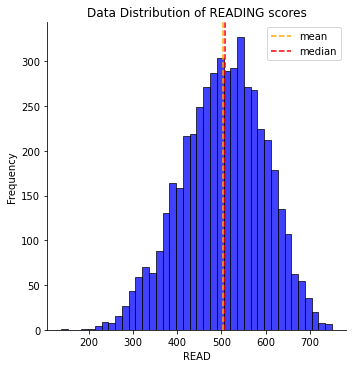

In [32]:
#Check data distribution of READING scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['READ'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of READING scores')

plt.axvline(train_japan['READ'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['READ'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();


<Figure size 432x432 with 0 Axes>

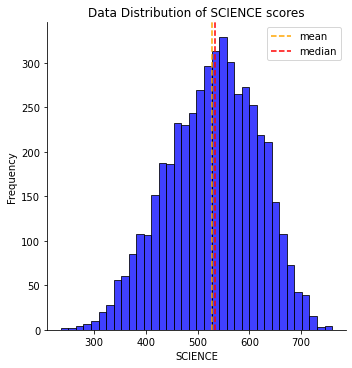

In [33]:
#Check data distribution of SCIENCE scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['SCIENCE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of SCIENCE scores')

plt.axvline(train_japan['SCIENCE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['SCIENCE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

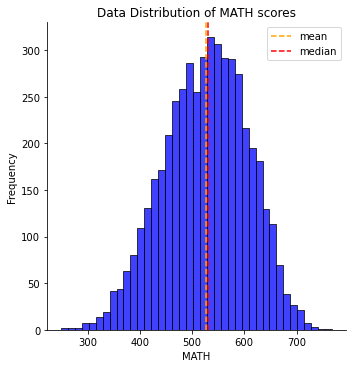

In [34]:
#Check data distribution of MATH scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['MATH'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of MATH scores')

plt.axvline(train_japan['MATH'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['MATH'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

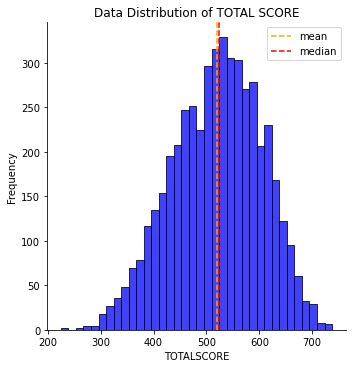

In [36]:
#Check data distribution of TOTALSCORE
plt.figure(figsize=(6,6))

sns.displot(train_japan['TOTALSCORE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of TOTAL SCORE')

plt.axvline(train_japan['TOTALSCORE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['TOTALSCORE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

All 'MATH','READ', 'SCIENCE', and 'TOTALSCORE' scores are normal distributed. Average score of SCIENCE is highest. In this study, TOTALSCORE will be the main target.

## Exploring correlations between features and the target variable

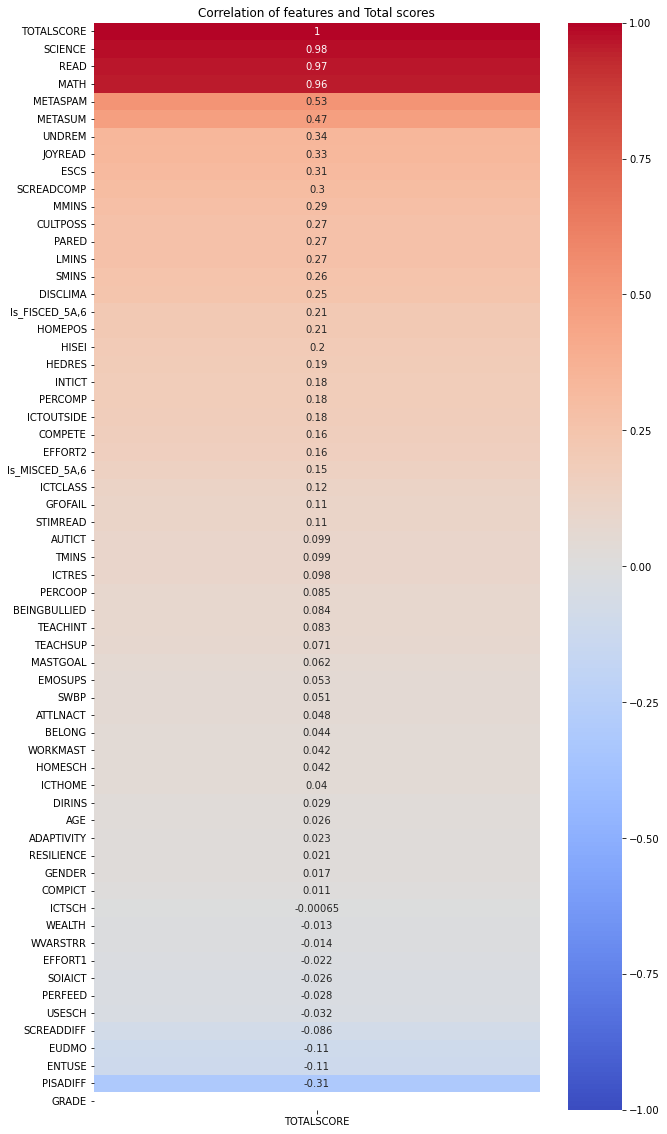

In [37]:
#Heatmap of correlation between features and TOTALSCORE
plt.figure(figsize = (10,20))
sns.heatmap(train_japan.corr()[['TOTALSCORE']].sort_values(by = 'TOTALSCORE', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of features and Total scores')

plt.yticks(rotation =0)
plt.show()

Due to too many features in building a model in this dataset, and the aim of this study is to explore features that impact PISA score. Thus, only features whcih have higher correlation with the target variable will be used in the models.

In [41]:
#Select features which have correlation above 0.18 or below -0.18 
selectd_features = (train_japan.corr()[['TOTALSCORE']] > 0.18) | (train_japan.corr()[['TOTALSCORE']] < -0.18)
selectd_features[selectd_features['TOTALSCORE']==True].index.values

array(['PARED', 'HISEI', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM',
       'METASUM', 'METASPAM', 'HOMEPOS', 'CULTPOSS', 'HEDRES', 'DISCLIMA',
       'JOYREAD', 'SCREADCOMP', 'PISADIFF', 'PERCOMP', 'INTICT', 'MATH',
       'SCIENCE', 'READ', 'TOTALSCORE', 'Is_FISCED_5A,6'], dtype=object)

In [ ]:
#Save files for another study.
train_japan.to_csv('train_pisa2018_japan.csv')
test_japan.to_csv('test_pisa2018_japan.csv')

# Building Regressor Models

In [43]:
#Assemble our X and y variables
X_train =train_japan[['PARED', 'HISEI', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM',
       'METASUM', 'METASPAM', 'HOMEPOS', 'CULTPOSS', 'HEDRES', 'DISCLIMA',
       'JOYREAD', 'SCREADCOMP', 'PISADIFF', 'PERCOMP', 'INTICT',
        'Is_FISCED_5A,6', 'ISCEDO','GENDER']]
X_train = pd.get_dummies(columns=['Is_FISCED_5A,6','ISCEDO', 'GENDER'], 
                         drop_first =True, data =X_train)
y_train = train_japan['TOTALSCORE']

X_test =test_japan[['PARED', 'HISEI', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM',
       'METASUM', 'METASPAM', 'HOMEPOS', 'CULTPOSS', 'HEDRES', 'DISCLIMA',
       'JOYREAD', 'SCREADCOMP', 'PISADIFF', 'PERCOMP', 'INTICT',
        'Is_FISCED_5A,6', 'ISCEDO','GENDER']]
X_test = pd.get_dummies(columns=['Is_FISCED_5A,6','ISCEDO', 'GENDER'], 
                         drop_first =True, data =X_test)
y_test = test_japan['TOTALSCORE']

## Dummy Regressor model

In [44]:
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor()
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)
# Test Score
baseline_model.score(X_test, y_test)
print(f'Test R-squared Score: {baseline_model.score(X_test, y_test)}')
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, baseline_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, baseline_preds, squared = False)}' )

Test R-squared Score: -0.0010826814733786438
MSE is : 7241.1802539402215
RMSE is : 85.09512473661592


## Linear Regression model

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Score
lr.score(X_train, y_train)
print(f'Train R-squared Score: {lr.score(X_train, y_train)}')

# Test Score
lr.score(X_test, y_test)
print(f'Test R-squared Score: {lr.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(lr, X_train, y_train, cv =5)
print(f' Cross Val Score :{cross_val_score(lr, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = lr.predict(X_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

Train R-squared Score: 0.5101786761220359
Test R-squared Score: 0.5297986594236404
 Cross Val Score :[0.48356068 0.50682424 0.49022146 0.53031158 0.50563126]

MSE is : 3401.1303219696138
RMSE is : 58.31921057395765


In [46]:
lr.intercept_

440.3535374419016

In [47]:
pd.Series(lr.coef_, index = X_train.columns).sort_values(ascending=False)

METASPAM             23.999375
METASUM              15.198229
JOYREAD              10.225092
DISCLIMA              8.063086
HEDRES                6.662291
PERCOMP               6.443560
ESCS                  6.105648
UNDREM                5.876445
INTICT                5.862757
CULTPOSS              5.743862
PARED                 3.361519
SCREADCOMP            3.059841
Is_FISCED_5A,6_1      1.842371
HISEI                 0.097289
LMINS                 0.065634
SMINS                 0.048777
MMINS                 0.038473
PISADIFF             -9.737824
HOMEPOS              -9.911834
GENDER_1            -12.663490
ISCEDO_Vocational   -14.316704
dtype: float64

#### Getting stadardized coefficients

In [48]:
scaler = StandardScaler()  #scaler object
X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_preds = lr.predict(X_test_sc)

In [49]:
# coefficient dataframe
lr_coef = pd.DataFrame(data=[lr.coef_],columns=X_train.columns).T.sort_values(by=0,ascending=False)

# Label the color the each coefficient
color = ['red' if x < 0 else 'blue' for x in lr_coef[0]]

# Assign the color_list to new column
lr_coef['color'] = color

lr_coef.head()

0 color
METASPAM  24.316783  blue
METASUM   15.480931  blue
JOYREAD   11.026039  blue
DISCLIMA   7.758525  blue
PERCOMP    6.336299  blue

In [50]:
# Select the highest values whether negative or positive
abs(lr_coef[0]).sort_values(ascending=False)[:10].index

Index(['METASPAM', 'METASUM', 'JOYREAD', 'PISADIFF', 'DISCLIMA', 'HOMEPOS',
       'PERCOMP', 'GENDER_1', 'ISCEDO_Vocational', 'INTICT'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 highest coefficient')

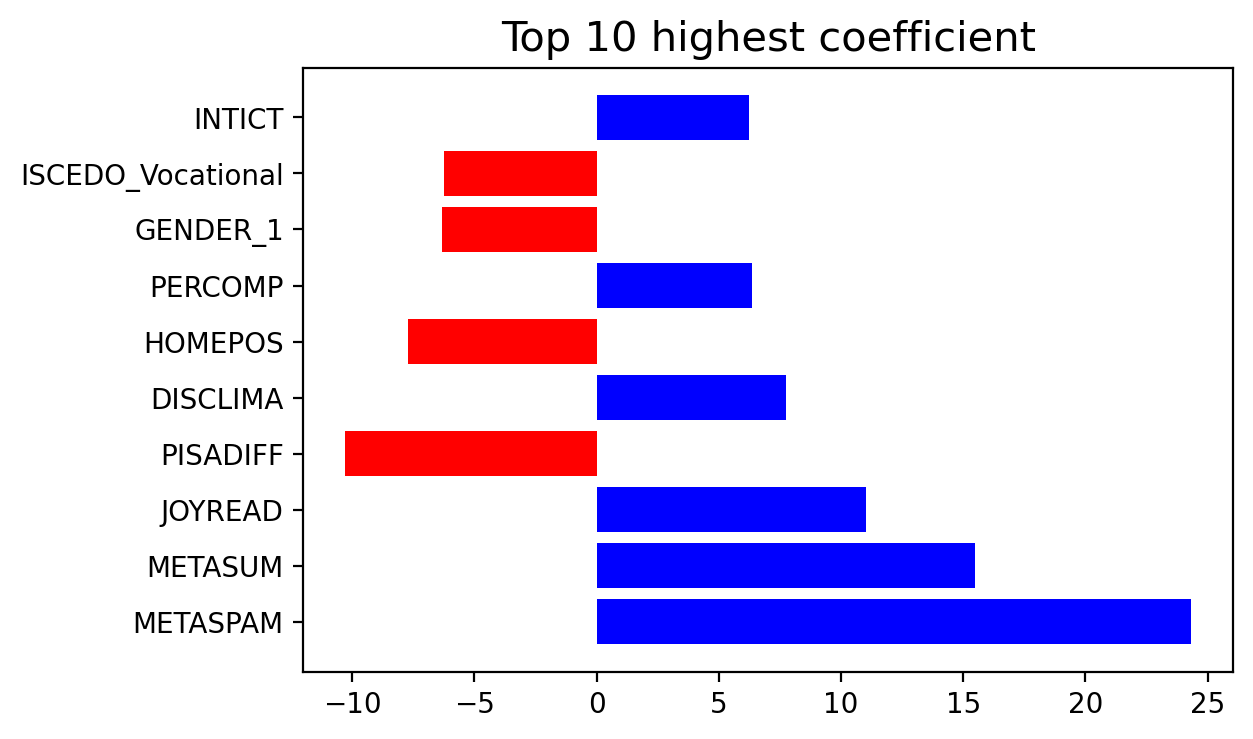

In [73]:
# Plot the coefficient of top 10 highest coefficient 
plt.figure(dpi=200)
plt.barh(lr_coef.loc[['METASPAM', 'METASUM', 'JOYREAD', 'PISADIFF', 'DISCLIMA', 'HOMEPOS',
       'PERCOMP', 'GENDER_1', 'ISCEDO_Vocational', 'INTICT']].
         index,lr_coef.loc[['METASPAM', 'METASUM', 'JOYREAD', 'PISADIFF', 'DISCLIMA', 'HOMEPOS',
       'PERCOMP', 'GENDER_1', 'ISCEDO_Vocational', 'INTICT']][0],
         color=lr_coef.loc[['METASPAM', 'METASUM', 'JOYREAD', 'PISADIFF', 'DISCLIMA', 'HOMEPOS',
       'PERCOMP', 'GENDER_1', 'ISCEDO_Vocational', 'INTICT']]['color'])
plt.title('Top 10 highest coefficient',size=15)

## Random Forest Regressor

In [52]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2,3,4]
}
regr = RandomForestRegressor(random_state=42)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [53]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 150}

In [54]:
clf.score(X_train, y_train)

0.4906781388666098

In [55]:
clf.score(X_test, y_test)

0.49755745324826783

In [56]:
# Making prediction
y_preds_clf = clf.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds_clf)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds_clf, squared = False)}' )

RFReg MSE is : 3634.3422132958253
RFReg RMSE is : 60.285505830969235


In [57]:
clf.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=150, random_state=42)

In [58]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  mean_test_score
11  {'max_depth': 4, 'n_estimators': 150}               4         0.457087
13  {'max_depth': 4, 'n_estimators': 250}               4         0.456899
14  {'max_depth': 4, 'n_estimators': 300}               4         0.456863
12  {'max_depth': 4, 'n_estimators': 200}               4         0.456804
10  {'max_depth': 4, 'n_estimators': 100}               4         0.456581

## Support Vector Mechine: SVM

In [59]:
#Building SVM model need standardized data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

#SVM
SVM = svm.SVR().fit(X_train_sc, y_train)
# Train Score
SVM.score(X_train_sc, y_train)
print(f'SVM Train R-squared Score: {SVM.score(X_train_sc, y_train)}')
print()

# Test Score
SVM.score(X_test_sc, y_test)
print(f'SVM Test R-squared Score: {SVM.score(X_test_sc, y_test)}')

# Cross Val Score
cross_val_score(SVM, X_train_sc, y_train, cv =5)
print(f'SVM Cross Val Score :{cross_val_score(SVM, X_train_sc, y_train, cv =5)}')
print()
# Making prediction
y_preds = SVM.predict(X_test_sc)

#evaluate SVMs with matrics
print(f'SVM MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'SVM RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

SVM Train R-squared Score: 0.47100612624896365

SVM Test R-squared Score: 0.48191169586003446
SVM Cross Val Score :[0.44023825 0.43324047 0.45591258 0.45698362 0.44516764]

SVM MSE is : 3747.513434369065
SVM RMSE is : 61.21693747950044


## XGboost regression model

In [61]:
xgb1 = XGBRegressor()
parameters = {'max_depth': [2,3,4,5],
              'subsample': [0.7, 1.0],
              'colsample_bytree': [0.7, 1.0],
              'n_estimators': [300, 500, 700]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
0.544355617690108
{'colsample_bytree': 1.0, 'max_depth': 2, 'n_estimators': 300, 'subsample': 1.0}


In [62]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  \
25  {'colsample_bytree': 1.0, 'max_depth': 2, 'n_e...               2   
1   {'colsample_bytree': 0.7, 'max_depth': 2, 'n_e...               2   
27  {'colsample_bytree': 1.0, 'max_depth': 2, 'n_e...               2   
3   {'colsample_bytree': 0.7, 'max_depth': 2, 'n_e...               2   
24  {'colsample_bytree': 1.0, 'max_depth': 2, 'n_e...               2   

    mean_test_score  
25         0.544356  
1          0.543586  
27         0.535761  
3          0.533628  
24         0.532337

In [63]:
#XGRegressor
XGReg2 = xg.XGBRegressor(max_depth = 2, n_estimators = 300, subsample = 1).fit(X_train, y_train) 
# Train Score
XGReg2.score(X_train, y_train)
print(f'XGReg2 Train R-squared Score: {XGReg2.score(X_train, y_train)}')
print()

# Test Score
XGReg2.score(X_test, y_test)
print(f'XGReg2 Test R-squared Score: {XGReg2.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg2, X_train, y_train, cv =5)
print(f'XGReg2 Cross Val Score :{cross_val_score(XGReg2, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg2.predict(X_test)

#evaluate models with matrics
print(f'XGReg2 MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg2 RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}')

XGReg2 Train R-squared Score: 0.6952235276136058

XGReg2 Test R-squared Score: 0.586341926543828
XGReg2 Cross Val Score :[0.52424131 0.56002909 0.53166367 0.60810392 0.5683696 ]

XGReg2 MSE is : 2992.133146270437
XGReg2 RMSE is : 54.70039438861878


Because XGB regressor performance is highest among the blackbox models, we will see how each features perform or explain the target varible using SHAP

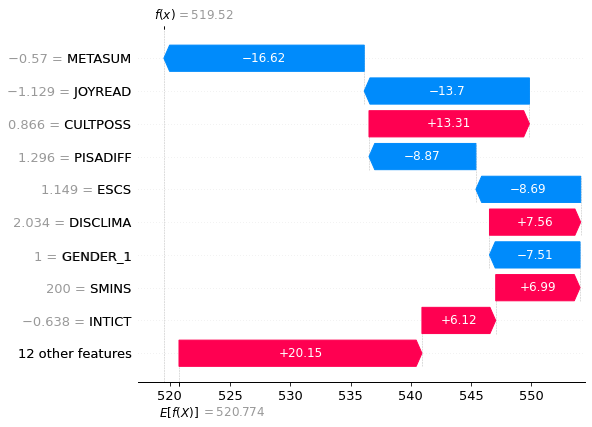

In [64]:
#Explain the model's predictions using SHAP
explainer = shap.Explainer(XGReg2, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[100])

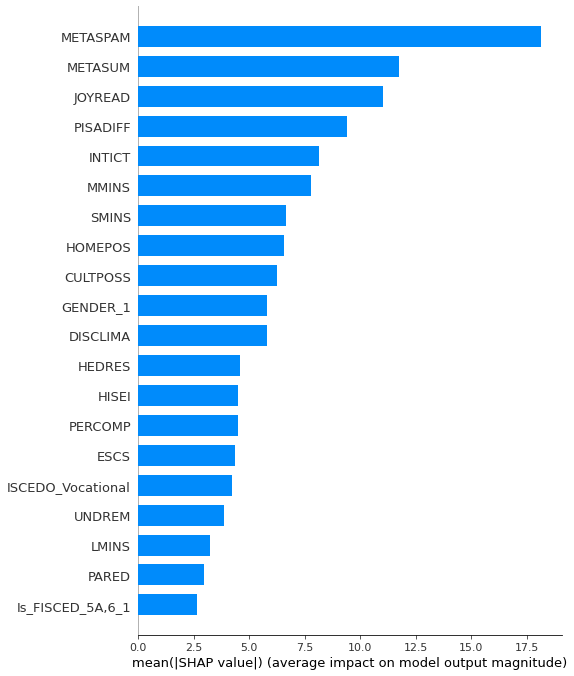

In [65]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

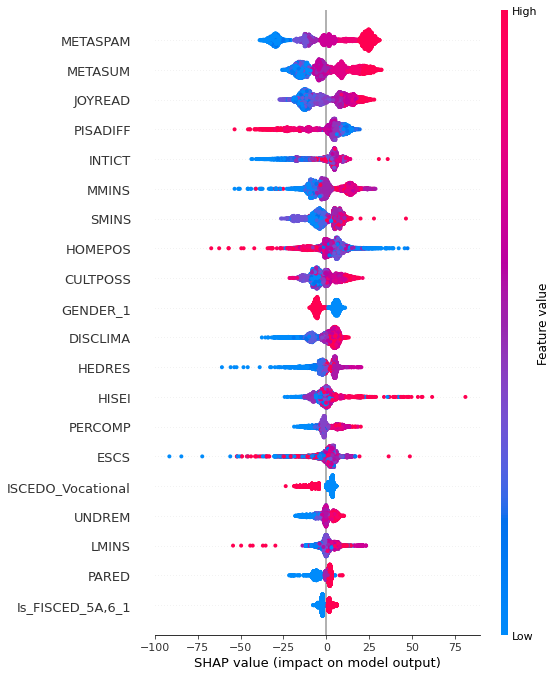

In [66]:
shap.summary_plot(shap_values, X_train)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


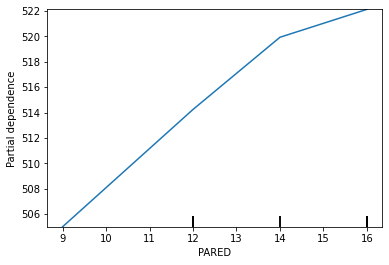

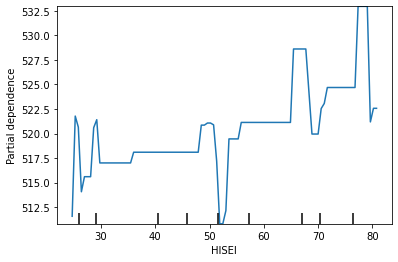

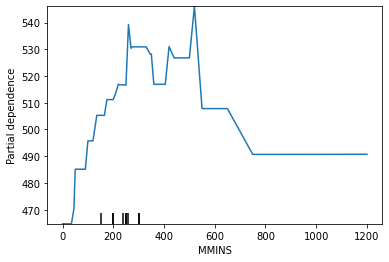

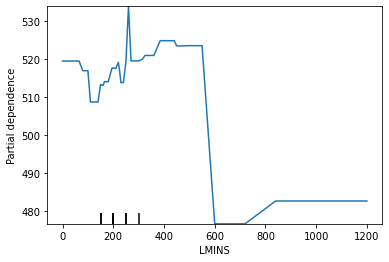

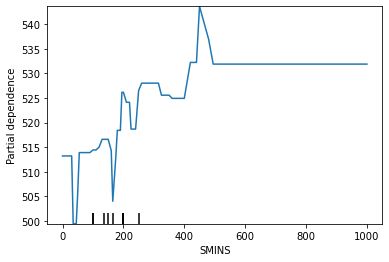

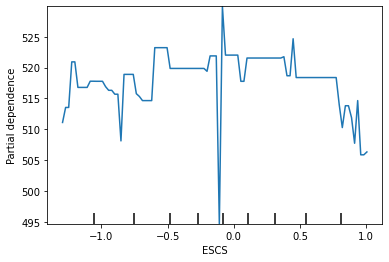

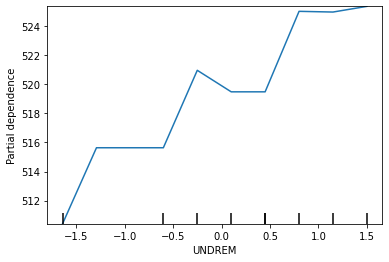

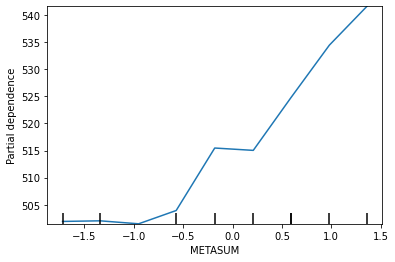

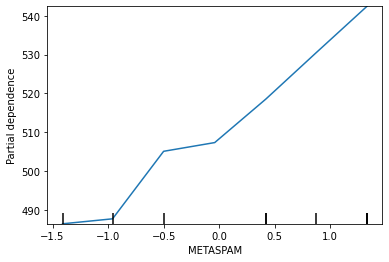

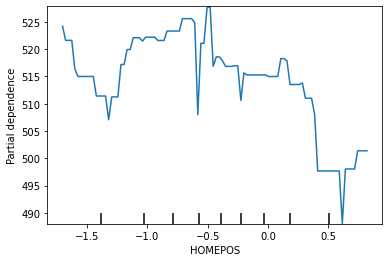

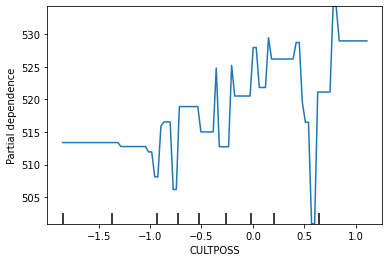

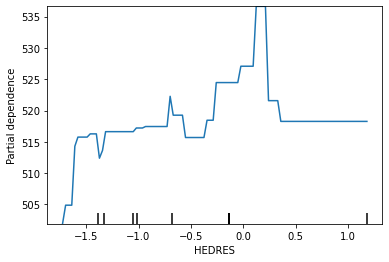

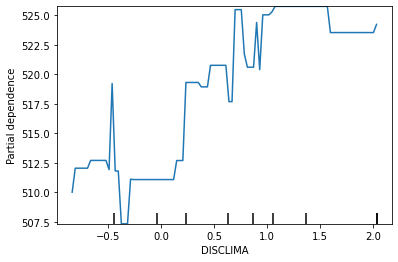

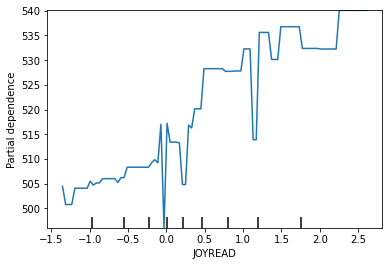

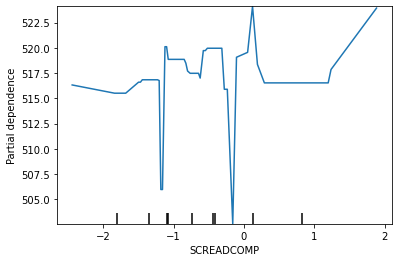

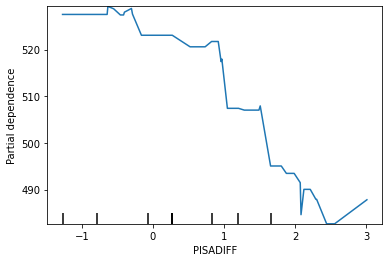

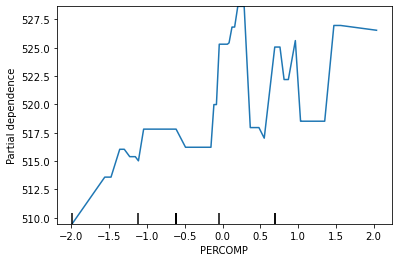

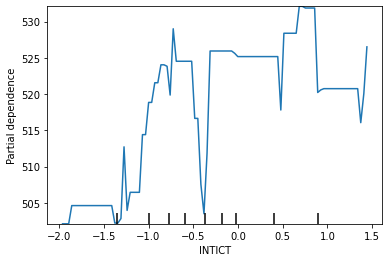

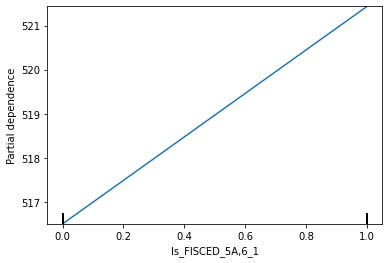

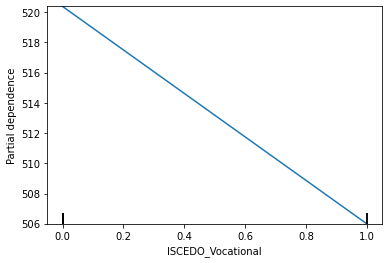

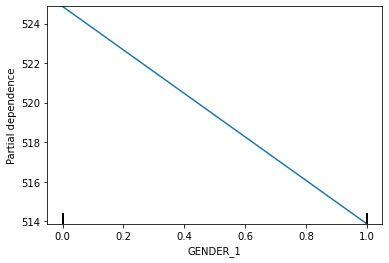

In [67]:
#Generate Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay
for cols_name in X_train.columns:
    PartialDependenceDisplay.from_estimator(XGReg2, X_train, [cols_name]);

In [68]:

#interpretml 
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression
from interpret.perf import RegressionPerf

## Explainable Boosting Regressor

In [69]:
#import interpretml 
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.perf import RegressionPerf

In [70]:
ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1, feature_names = X_train.columns)
ebm.fit(X_train, y_train) 

ExplainableBoostingRegressor(feature_names=['PARED', 'HISEI', 'MMINS', 'LMINS',
                                            'SMINS', 'ESCS', 'UNDREM',
                                            'METASUM', 'METASPAM', 'HOMEPOS',
                                            'CULTPOSS', 'HEDRES', 'DISCLIMA',
                                            'JOYREAD', 'SCREADCOMP', 'PISADIFF',
                                            'PERCOMP', 'INTICT',
                                            'Is_FISCED_5A,6_1',
                                            'ISCEDO_Vocational', 'GENDER_1',
                                            'MMINS x ISCEDO_Vocational',
                                            'HOMEPOS x PISADIFF',
                                            'METASUM x PERCOMP',
                                            'UNDREM x INTICT',
                                            'SMINS...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'categorical', 'categorical',
                                            'categorical', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction', ...],
                             n_jobs=-1)

In [71]:
import warnings
warnings.filterwarnings("ignore")
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7127/2027994744528/ -->

In [72]:
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7127/2027985243536/ -->